<a href="https://colab.research.google.com/github/Pratikshathorat96/Retail-Sales-Prediction-ML-regression-/blob/main/Regression_project_on_Rossmann_retail_store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Retail Store Prediction(ML regression) on Rossmann store.



##### **Project Type**    - EDA/Regression
##### **Contribution**    - KIRTI VERMA, MANJEET SULEKH, SURAJ THAKUR


# **Project Summary -**

This project aims to predict the daily sales of 1,115 Rossmann stores across Europe for up to six weeks in advance using machine learning regression models. The model takes into consideration various factors that influence store sales, such as promotions, competition, holidays, seasonality, and locality.

This dataset is a live dataset of Roseman Stores. On analsysing this problem we observe that Roseman problem is a regression problem and our primarily goal is to predict the sales figures of Roseman problem.

In this project, I have attempted to analyze the retail sales dataset of Rossmann stores and build a predictive model to forecast the sales of any Rossmann store for any date. No personal information of customer is provided in this dataset.

In this Notebook we work on following topics

Analysing the Dataset by using Exploratory Data Analysis. Using Exponential Moving Averages analyse Trends and Seasonality in Roseman dataset. Analyse Regression analysis using following prediction analysis, A. Linear Regression Analysis B. Elastic Regression ( Lasso and Ridge Regression). C. Random Forest Regression. d.adaboost and Xgboost).

By applying above algorthim we find accuracy of 98% by Xgboost.
Dataset

My drive link to dataset -

Rossman store data https://drive.google.com/file/d/1Z3SFeRqKGgV6Cg-aXFr2GhYC1sAwHyzg/view?usp=sharing

store - https://drive.google.com/file/d/1Q7g0D1FquwKcaLpXd4gzecJ9Tt4Hz20T/view?usp=sharing

Kaggle: https://www.kaggle.com/c/rossmann-store-sales/data.


# **GitHub Link -**

https://github.com/kirtiver22

# **Problem Statement**


The problem statement for this project is to develop a machine learning regression model that accurately predicts the daily sales for up to six weeks in advance for 1,115 Rossmann stores across Europe. The model should take into account various factors that influence store sales, such as promotions, competition, holidays, seasonality, and locality. The ultimate goal is to help Rossmann store managers make informed decisions regarding inventory management, staffing, and promotional strategies, leading to increased sales and profitability for the business.

# ***Let's Begin !***

## ***1. Know Your Data***

There have been given two datasets

**1st** Rossmann Stores Data.csv - historical data including Sales

**and 2nd** store.csv - supplemental information about the store

Data fields Most of the fields are self-explanatory. The following are descriptions for those that aren't.

1. Id - an Id that represents a (Store, Date) duple within the test set

2. Store - a unique Id for each store

3. Sales - the turnover for any given day (this is what you are predicting)

4. Customers - the number of customers on a given day

5. Open - an indicator for whether the store was open: 0 = closed, 1 = open

6. StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None

7. SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools

8. StoreType - differentiates between 4 different store models: a, b, c, d

9. Assortment - describes an assortment level: a = basic, b = extra, c = extended

10.  CompetitionDistance - distance in meters to the nearest competitor store

11. CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened

12. Promo - indicates whether a store is running a promo on that day

13. Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating

14. Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2

15. PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

In [ ]:
# Import necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import seaborn as sns
import plotly.express as px
import pandas as pd
import ast
import math
import random
from scipy.stats import skew
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import pickle

#to display all the graph in the workbook
%matplotlib inline
sns.set_style("whitegrid",{'grid.linestyle': '--'})
import warnings
warnings.filterwarnings("ignore")

### Import Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset Loading

In [ ]:
# Load Dataset
#Rossmann Data
store_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Copy of store.csv")
#store data
sales_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Rossmann Stores Data.csv")

### Dataset First View

In [ ]:
# Dataset First Look
sales_df.head() #sale

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
sales_df.iloc[55808:55813] #sale sales_df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
55808,59,4,2015-06-11,4403,491,1,0,0,0
55809,60,4,2015-06-11,7289,678,1,0,0,0
55810,61,4,2015-06-11,3446,498,1,0,0,0
55811,62,4,2015-06-11,5975,708,1,0,0,0
55812,63,4,2015-06-11,5438,525,1,0,0,0


In [ ]:
store_df.head()
# store

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
store_df.tail()# store

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [ ]:
sales_df['StateHoliday']=sales_df['StateHoliday'].replace(['a','b','c'],1)


In [ ]:
unique=store_df['PromoInterval'].unique()
print(unique)
print('\n')
nunique=store_df['PromoInterval'].nunique()
print(nunique)
print(store_df['PromoInterval'].dtypes)
'''to convert the promointerval ''store_df['PromoInterval'] = store_df['PromoInterval'].replace({
    0: 0,
    'Jan,Apr,Jul,Oct': 1,
    'Feb,May,Aug,Nov': 1,
    'Mar,Jun,Sept,Dec': 1
})'''


[nan 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']


3
object


"to convert the promointerval ''store_df['PromoInterval'] = store_df['PromoInterval'].replace({\n    0: 0,\n    'Jan,Apr,Jul,Oct': 1,\n    'Feb,May,Aug,Nov': 1,\n    'Mar,Jun,Sept,Dec': 1\n})"

In [ ]:
# change state holiday value a,b,c is equal to 1
sales_df['StateHoliday'].value_counts()

StateHoliday
0    855087
0    131072
1     31050
Name: count, dtype: int64

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
#overall row and coloumns
overall_number_of_row_and_columns  = sales_df.shape
print(overall_number_of_row_and_columns)

(1017209, 9)


In [ ]:
# Total number of rows in sales
number_of_rows = len(sales_df.index)
print(number_of_rows)

1017209


In [ ]:
# Total number of columns in sales
number_of_columns = len(sales_df.columns)
print(number_of_columns)

9


In [ ]:
# Column names in sales
sales_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [ ]:
#total number of rows in store
number_of_rows = len(store_df.index)
print(number_of_rows)

1115


In [ ]:
#overall row and coloumns in store
overall_number_of_row_and_columns  = store_df.shape
print(overall_number_of_row_and_columns)

(1115, 10)


In [ ]:
# Column names in store
store_df.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

### Dataset Information

In [ ]:
# Dataset Info #sale
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [ ]:
#checking description of data #sale
sales_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Store,1017209.0,558.429727,321.908651,1.0,280.0,558.0,838.0,1115.0
DayOfWeek,1017209.0,3.998341,1.997391,1.0,2.0,4.0,6.0,7.0
Sales,1017209.0,5773.818972,3849.926175,0.0,3727.0,5744.0,7856.0,41551.0
Customers,1017209.0,633.145946,464.411734,0.0,405.0,609.0,837.0,7388.0
Open,1017209.0,0.830107,0.375539,0.0,1.0,1.0,1.0,1.0
Promo,1017209.0,0.381515,0.485759,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,1017209.0,0.178647,0.383056,0.0,0.0,0.0,0.0,1.0


In [ ]:
# Dataset Info of store dataset
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [ ]:
#checking description of data of store dataset
store_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Store,1115.0,558.000000,322.017080,1.0,279.5,558.0,836.5,1115.0
CompetitionDistance,1112.0,5404.901079,7663.174720,20.0,717.5,2325.0,6882.5,75860.0
CompetitionOpenSinceMonth,761.0,7.224704,3.212348,1.0,4.0,8.0,10.0,12.0
CompetitionOpenSinceYear,761.0,2008.668857,6.195983,1900.0,2006.0,2010.0,2013.0,2015.0
Promo2,1115.0,0.512108,0.500078,0.0,0.0,1.0,1.0,1.0
Promo2SinceWeek,571.0,23.595447,14.141984,1.0,13.0,22.0,37.0,50.0
Promo2SinceYear,571.0,2011.763573,1.674935,2009.0,2011.0,2012.0,2013.0,2015.0


#### Duplicate Values

In [ ]:
duplicate_rows = store_df.duplicated(subset=['PromoInterval'])


In [ ]:
# Dataset Duplicate Value Count
df2 = sales_df.pivot_table(index =['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],)
df2

Empty DataFrame
Columns: []
Index: [(1, 1, 2013-01-07, 7176, 785, 1, 1, 0, 1), (1, 1, 2013-01-14, 4717, 616, 1, 0, 0, 0), (1, 1, 2013-01-21, 5394, 607, 1, 1, 0, 0), (1, 1, 2013-01-28, 4055, 549, 1, 0, 0, 0), (1, 1, 2013-02-04, 7032, 762, 1, 1, 0, 0), (1, 1, 2013-02-11, 4409, 599, 1, 0, 0, 0), (1, 1, 2013-02-18, 6407, 710, 1, 1, 0, 0), (1, 1, 2013-02-25, 4038, 534, 1, 0, 0, 0), (1, 1, 2013-03-04, 7675, 840, 1, 1, 0, 0), (1, 1, 2013-03-11, 4949, 618, 1, 0, 0, 0), (1, 1, 2013-03-18, 7072, 778, 1, 1, 0, 0), (1, 1, 2013-03-25, 6729, 777, 1, 1, 0, 1), (1, 1, 2013-04-01, 0, 0, 0, 0, 1, 1), (1, 1, 2013-04-08, 6046, 695, 1, 1, 0, 0), (1, 1, 2013-04-15, 3941, 526, 1, 0, 0, 0), (1, 1, 2013-04-22, 5672, 623, 1, 1, 0, 0), (1, 1, 2013-04-29, 5821, 641, 1, 1, 0, 0), (1, 1, 2013-05-06, 4568, 562, 1, 0, 0, 0), (1, 1, 2013-05-13, 6106, 660, 1, 1, 0, 0), (1, 1, 2013-05-20, 0, 0, 0, 0, 1, 0), (1, 1, 2013-05-27, 5519, 606, 1, 1, 0, 0), (1, 1, 2013-06-03, 5422, 619, 1, 1, 0, 0), (1, 1, 2013-06-10, 4291, 531, 1, 0, 0, 0), (1, 1, 2013-06-17, 5337, 585, 1, 1, 0, 0), (1, 1, 2013-06-24, 3549, 494, 1, 0, 0, 0), (1, 1, 2013-07-01, 5614, 614, 1, 1, 0, 0), (1, 1, 2013-07-08, 4475, 523, 1, 0, 0, 1), (1, 1, 2013-07-15, 6377, 657, 1, 1, 0, 1), (1, 1, 2013-07-22, 4149, 493, 1, 0, 0, 1), (1, 1, 2013-07-29, 6290, 630, 1, 1, 0, 1), (1, 1, 2013-08-05, 4086, 522, 1, 0, 0, 1), (1, 1, 2013-08-12, 5326, 600, 1, 1, 0, 1), (1, 1, 2013-08-19, 3954, 513, 1, 0, 0, 0), (1, 1, 2013-08-26, 5482, 613, 1, 1, 0, 0), (1, 1, 2013-09-02, 4195, 496, 1, 0, 0, 0), (1, 1, 2013-09-09, 5893, 601, 1, 1, 0, 0), (1, 1, 2013-09-16, 4249, 568, 1, 0, 0, 0), (1, 1, 2013-09-23, 4770, 542, 1, 1, 0, 0), (1, 1, 2013-09-30, 4088, 516, 1, 0, 0, 0), (1, 1, 2013-10-07, 6004, 626, 1, 1, 0, 0), (1, 1, 2013-10-14, 3773, 478, 1, 0, 0, 1), (1, 1, 2013-10-21, 5055, 571, 1, 1, 0, 1), (1, 1, 2013-10-28, 3557, 494, 1, 0, 0, 0), (1, 1, 2013-11-04, 5861, 620, 1, 1, 0, 0), (1, 1, 2013-11-11, 4014, 519, 1, 0, 0, 0), (1, 1, 2013-11-18, 5927, 681, 1, 1, 0, 0), (1, 1, 2013-11-25, 4600, 575, 1, 0, 0, 0), (1, 1, 2013-12-02, 6943, 754, 1, 1, 0, 0), (1, 1, 2013-12-09, 4462, 576, 1, 0, 0, 0), (1, 1, 2013-12-16, 8277, 825, 1, 1, 0, 0), (1, 1, 2013-12-23, 9528, 1130, 1, 0, 0, 1), (1, 1, 2013-12-30, 7193, 796, 1, 0, 0, 1), (1, 1, 2014-01-06, 6194, 649, 1, 1, 0, 1), (1, 1, 2014-01-13, 3994, 545, 1, 0, 0, 0), (1, 1, 2014-01-20, 6148, 653, 1, 1, 0, 0), (1, 1, 2014-01-27, 3601, 517, 1, 0, 0, 0), (1, 1, 2014-02-03, 5839, 638, 1, 1, 0, 0), (1, 1, 2014-02-10, 3591, 502, 1, 0, 0, 0), (1, 1, 2014-02-17, 5393, 606, 1, 1, 0, 0), (1, 1, 2014-02-24, 3826, 481, 1, 0, 0, 0), (1, 1, 2014-03-03, 6198, 616, 1, 1, 0, 0), (1, 1, 2014-03-10, 3573, 469, 1, 0, 0, 0), (1, 1, 2014-03-17, 5563, 628, 1, 1, 0, 0), (1, 1, 2014-03-24, 3850, 511, 1, 0, 0, 0), (1, 1, 2014-03-31, 6008, 640, 1, 1, 0, 0), (1, 1, 2014-04-07, 3751, 497, 1, 0, 0, 0), (1, 1, 2014-04-14, 6803, 693, 1, 1, 0, 1), (1, 1, 2014-04-21, 0, 0, 0, 0, 1, 1), (1, 1, 2014-04-28, 5488, 607, 1, 1, 0, 0), (1, 1, 2014-05-05, 5325, 615, 1, 1, 0, 0), (1, 1, 2014-05-12, 3957, 555, 1, 0, 0, 0), (1, 1, 2014-05-19, 5637, 608, 1, 1, 0, 0), (1, 1, 2014-05-26, 3912, 494, 1, 0, 0, 0), (1, 1, 2014-06-02, 6071, 609, 1, 1, 0, 0), (1, 1, 2014-06-09, 0, 0, 0, 0, 1, 0), (1, 1, 2014-06-16, 4788, 529, 1, 1, 0, 0), (1, 1, 2014-06-23, 3755, 456, 1, 0, 0, 0), (1, 1, 2014-06-30, 5738, 641, 1, 1, 0, 0), (1, 1, 2014-07-07, 4223, 505, 1, 0, 0, 0), (1, 1, 2014-07-14, 5083, 532, 1, 1, 0, 0), (1, 1, 2014-07-21, 4507, 528, 1, 0, 0, 0), (1, 1, 2014-07-28, 5372, 584, 1, 1, 0, 1), (1, 1, 2014-08-04, 5655, 592, 1, 1, 0, 1), (1, 1, 2014-08-11, 3886, 505, 1, 0, 0, 1), (1, 1, 2014-08-18, 5623, 598, 1, 1, 0, 1), (1, 1, 2014-08-25, 3414, 449, 1, 0, 0, 1), (1, 1, 2014-09-01, 5464, 561, 1, 1, 0, 1), (1, 1, 2014-09-08, 3676, 530, 1, 0, 0, 0), (1, 1, 2014-09-15, 4611, 545, 1, 1, 0, 0), (1, 1, 2014-09-22, 3982, 466, 1, 0, 0, 0), (1, 1, 2014-09-29, 5280, 566, 1, 1, 0, 0), (1, 1, 2014-10-06, 5402, 608, 1, 1, 0, 0), (1, 1, 2014-10-13, 4033, 49

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count of sales
sales_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [ ]:
# Missing Values/Null Values Count of store
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [ ]:
# store info
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


<Axes: >

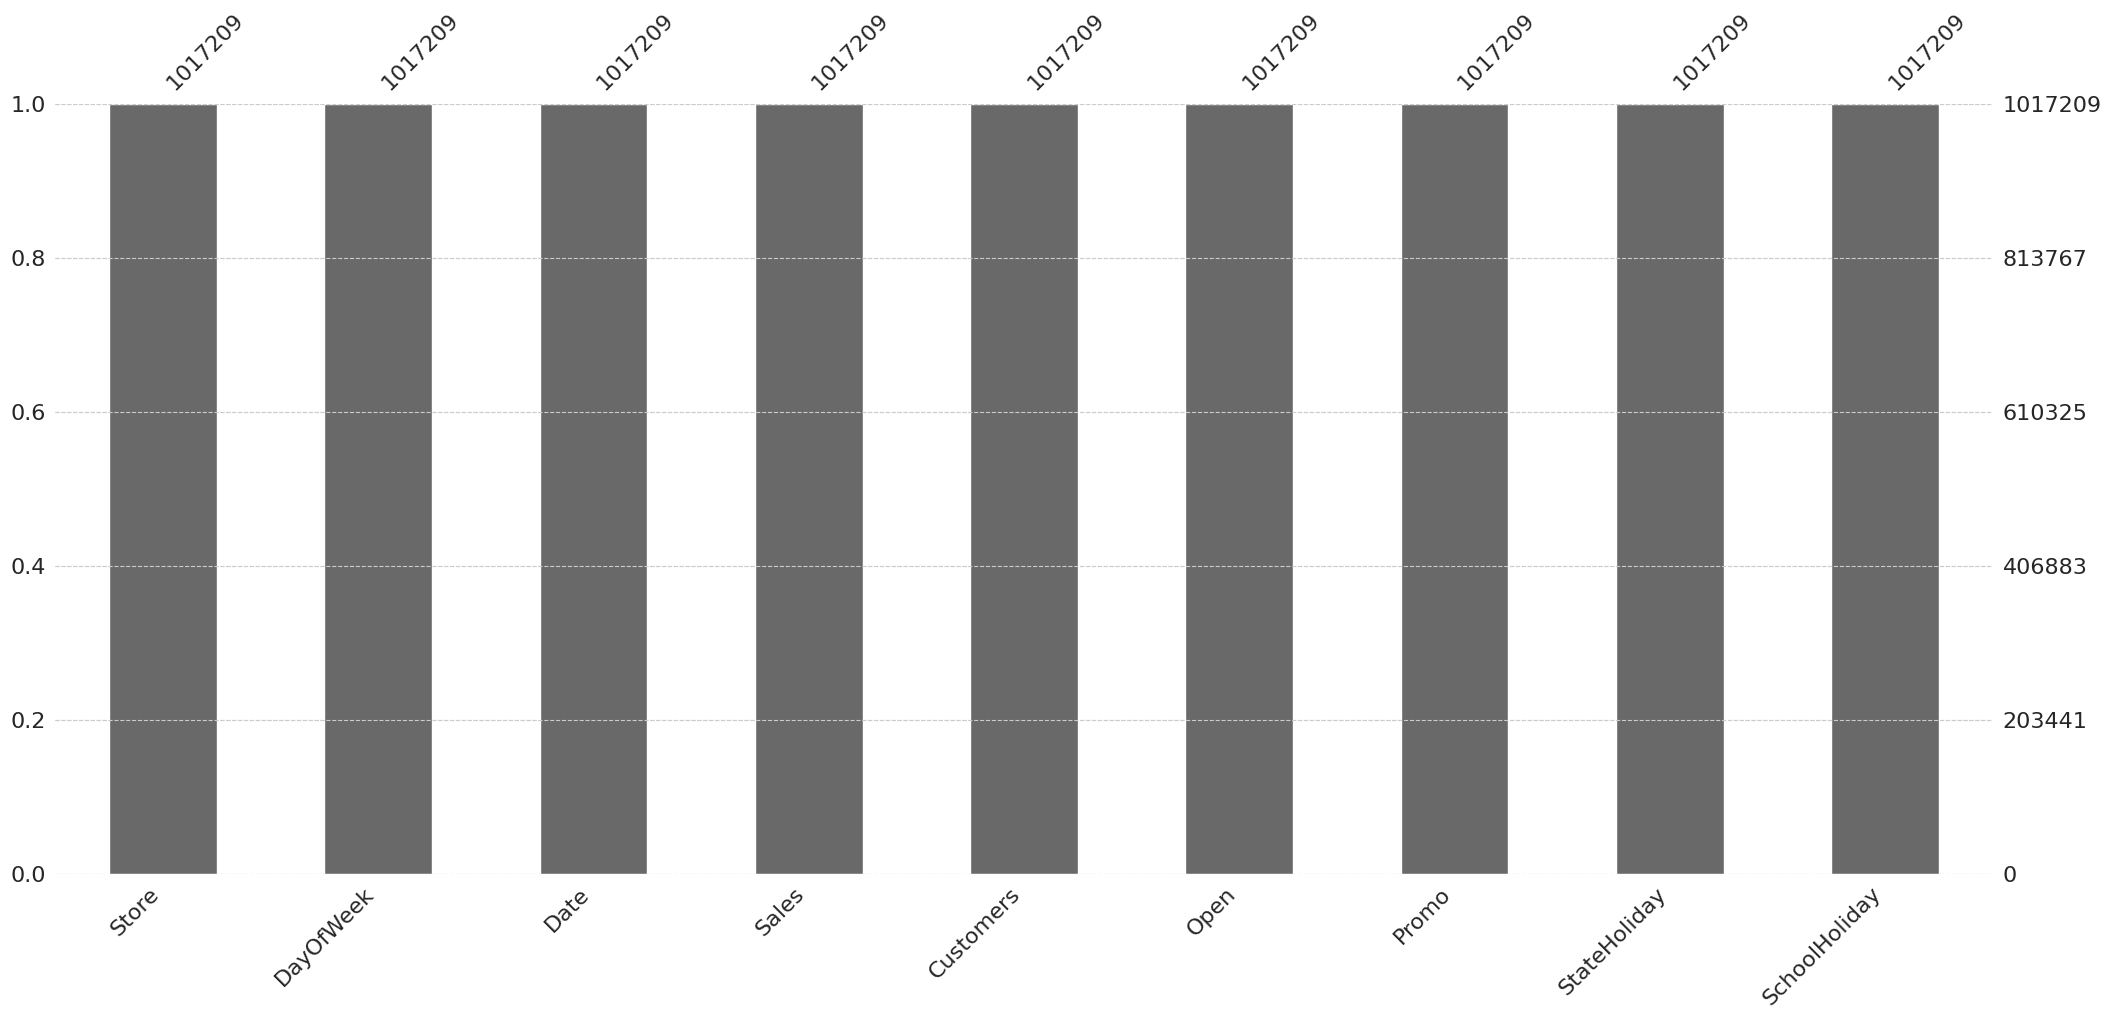

In [ ]:
# Visualizing the missing values for sale
import missingno as msno
msno.bar(sales_df)

<Axes: >

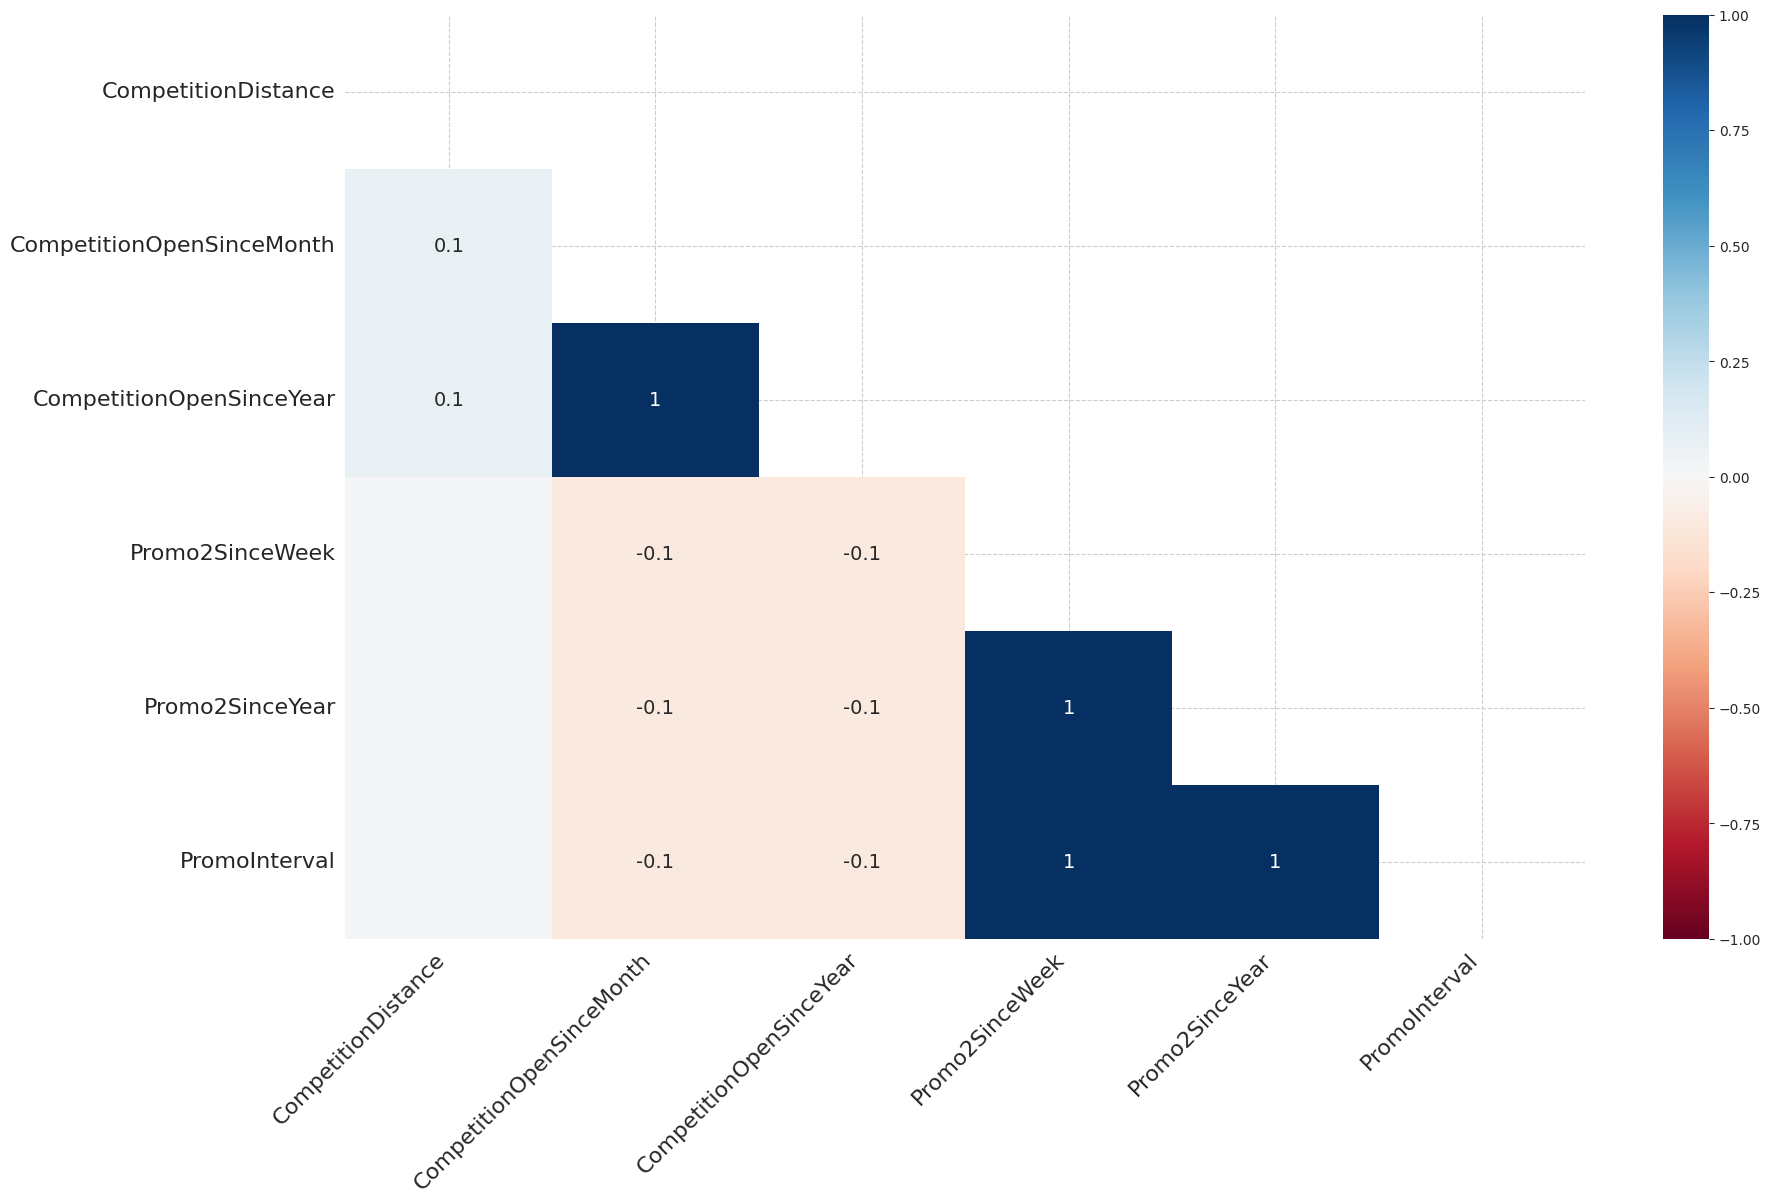

In [ ]:
# Visualizing the missing values for store
import missingno as msno
msno.heatmap(store_df)

### What did you know about your dataset?


The Rossmann Store Sales dataset is a publicly available dataset that was used in a Kaggle competition. The dataset contains historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set.

The dataset includes the following features:
* data contains rows and columns

Store: The ID of the store
Date: The date of the sales data
Sales: The number of products sold on that date
Customers: The number of customers who visited the store on that date
Promo: Whether or not a promotion was running on that date
CompetitionDistance: The distance to the nearest competitor
StateHoliday: Whether or not a state holiday was observed on that date
SchoolHoliday: Whether or not a school holiday was observed on that date
The dataset is well-balanced, with a good mix of stores, dates, and promotional events. The data is also clean and free of errors.

The winning solution for the Kaggle competition used a combination of XGBoost and SARIMAX models. The XGBoost models were used to capture the nonlinear relationships in the data, while the SARIMAX models were used to capture the seasonality in the data.

The Rossmann Store Sales dataset is a valuable resource for data scientists who are interested in forecasting retail sales. The dataset is well-balanced and clean, and the winning solution provides a good starting point for developing your own forecasting models.

## ***2. Understanding Your Variables***

In [ ]:
#overall row and coloumns
overall_number_of_row_and_columns  = sales_df.shape
print(overall_number_of_row_and_columns)

(1017209, 9)


In [ ]:
# Dataset Columns
number_of_columns = len(sales_df.columns)
print(number_of_columns)

9


In [ ]:
# Column names
sales_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [ ]:
# Dataset Describe
sales_df.describe(include='all')
#distribution and range of the values in the dataset

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
count,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1017209,1.017209e+06
unique,NaN,NaN,942,NaN,NaN,NaN,NaN,3,NaN
top,NaN,NaN,2015-07-31,NaN,NaN,NaN,NaN,0,NaN
freq,NaN,NaN,1115,NaN,NaN,NaN,NaN,855087,NaN
mean,5.584297e+02,3.998341e+00,NaN,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,NaN,1.786467e-01
std,3.219087e+02,1.997391e+00,NaN,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,NaN,3.830564e-01
min,1.000000e+00,1.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00
25%,2.800000e+02,2.000000e+00,NaN,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
50%,5.580000e+02,4.000000e+00,NaN,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
75%,8.380000e+02,6.000000e+00,NaN,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,NaN,0.000000e+00


In [ ]:
# Dataset Describe for store
store_df.describe(include='all')
#distribution and range of the values in the dataset

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
count,1115.00000,1115,1115,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000,571
unique,NaN,4,3,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,a,a,NaN,NaN,NaN,NaN,NaN,NaN,"Jan,Apr,Jul,Oct"
freq,NaN,602,593,NaN,NaN,NaN,NaN,NaN,NaN,335
mean,558.00000,NaN,NaN,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573,NaN
std,322.01708,NaN,NaN,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935,NaN
min,1.00000,NaN,NaN,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000,NaN
25%,279.50000,NaN,NaN,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000,NaN
50%,558.00000,NaN,NaN,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000,NaN
75%,836.50000,NaN,NaN,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000,NaN


### Variables Description

1. Store ID: An integer that uniquely identifies each store.

2. DayOfWeek: An integer that represents the day of the week (1 for Monday, 2 for Tuesday, etc.).

3. Date: The date of the observation.

4. Open: A binary variable indicating whether the store was open on the given day.

5. Promo: A binary variable indicating whether there was a promotional sale in effect at the store on the given day.

6. StateHoliday: A categorical variable indicating whether the day was a state holiday in the store's region.

7. SchoolHoliday: A binary variable indicating whether there was a school holiday in the store's region on the given day.

8. StoreType: A categorical variable indicating the type of store (a, b, c, or d).

9. Assortment: A categorical variable indicating the level of assortment provided in the store (a = basic, b = extra, c = extended).

10. CompetitionDistance: The distance in meters to the nearest competitor store.

11. CompetitionOpenSince[Month/Year]: The month and year of the nearest competitor store's opening date.

12. Promo2: A binary variable indicating whether the store was participating in a continuing and consecutive promotion (i.e. a second ongoing promotion after the first that is not directly related to the first) on the given day.

13. Promo2Since[Year/Week]: The year and week of the store's participating in the second promotion.

14. PromoInterval: A categorical variable indicating the consecutive intervals at which the store is running the second promotion.

15. Sales: The amount of sales for the given day, which is the target variable that we are trying to predict.




### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
print(sales_df.nunique() )
print('\n')
#store_df.nunique()

Store             1115
DayOfWeek            7
Date               942
Sales            21734
Customers         4086
Open                 2
Promo                2
StateHoliday         3
SchoolHoliday        2
dtype: int64




In [ ]:
# Competition Distance - distance in meters to the nearest competitor store

sales_df['SchoolHoliday'] .unique()


array([1, 0])

In [ ]:
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [ ]:
store_df.nunique()
#unique value of store


Store                        1115
StoreType                       4
Assortment                      3
CompetitionDistance           654
CompetitionOpenSinceMonth      12
CompetitionOpenSinceYear       23
Promo2                          2
Promo2SinceWeek                24
Promo2SinceYear                 7
PromoInterval                   3
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# STORE DATASET FILL INTO NULL VALUES I.E 0
store_df['CompetitionDistance'] = store_df['CompetitionDistance'].fillna(0)
store_df['CompetitionOpenSinceMonth'] = store_df['CompetitionOpenSinceMonth'].fillna(0)
store_df['CompetitionOpenSinceYear'] = store_df['CompetitionOpenSinceYear'].fillna(0)
store_df['Promo2SinceWeek'] = store_df['Promo2SinceWeek'].fillna(0)
store_df['Promo2SinceYear'] = store_df['Promo2SinceYear'].fillna(0)
store_df['PromoInterval'] = store_df['PromoInterval'].fillna(0)


In [ ]:
store_df.isna().sum()
#count the number of missing values in each column

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [ ]:
store_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,0.0,0.0,0
1112,1113,a,c,9260.0,0.0,0.0,0,0.0,0.0,0
1113,1114,a,c,870.0,0.0,0.0,0,0.0,0.0,0


In [ ]:
# Merge the two datasets based on the 'Store' column on left
total_df = pd.merge(sales_df, store_df, on='Store', how='left')
print("Data has been successfully merged")


Data has been successfully merged


In [ ]:
total_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,1,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,1,1,c,c,1880.0,4.0,2006.0,0,0.0,0.0,0
1017206,1113,2,2013-01-01,0,0,0,0,1,1,a,c,9260.0,0.0,0.0,0,0.0,0.0,0
1017207,1114,2,2013-01-01,0,0,0,0,1,1,a,c,870.0,0.0,0.0,0,0.0,0.0,0


In [ ]:
# Replace string values with numeric values....
#'Jan,Apr,Jul,Oct': 1,
#  'Feb,May,Aug,Nov': 2,
 #   'Mar,Jun,Sept,Dec': 3,
  #  '0': 0
total_df['PromoInterval'] = total_df['PromoInterval'].replace({
    'Jan,Apr,Jul,Oct': 1,
    'Feb,May,Aug,Nov': 2,
    'Mar,Jun,Sept,Dec': 3,
    '0': 0
})

# Convert the column to integer
total_df['PromoInterval'] = total_df['PromoInterval'].astype(int)


In [ ]:
# change datatype object into date format
sales_df['Date'].unique()

array(['2015-07-31', '2015-07-30', '2015-07-29', '2015-07-28',
       '2015-07-27', '2015-07-26', '2015-07-25', '2015-07-24',
       '2015-07-23', '2015-07-22', '2015-07-21', '2015-07-20',
       '2015-07-19', '2015-07-18', '2015-07-17', '2015-07-16',
       '2015-07-15', '2015-07-14', '2015-07-13', '2015-07-12',
       '2015-07-11', '2015-07-10', '2015-07-09', '2015-07-08',
       '2015-07-07', '2015-07-06', '2015-07-05', '2015-07-04',
       '2015-07-03', '2015-07-02', '2015-07-01', '2015-06-30',
       '2015-06-29', '2015-06-28', '2015-06-27', '2015-06-26',
       '2015-06-25', '2015-06-24', '2015-06-23', '2015-06-22',
       '2015-06-21', '2015-06-20', '2015-06-19', '2015-06-18',
       '2015-06-17', '2015-06-16', '2015-06-15', '2015-06-14',
       '2015-06-13', '2015-06-12', '2015-06-11', '2015-06-10',
       '2015-06-09', '2015-06-08', '2015-06-07', '2015-06-06',
       '2015-06-05', '2015-06-04', '2015-06-03', '2015-06-02',
       '2015-06-01', '2015-05-31', '2015-05-30', '2015-

The dataset is from 1 January 2013 to 31 July 2015 , i.e. approx. 2.5 yrs.

In [ ]:
li = ["DayOfWeek" , "StateHoliday" , "SchoolHoliday"]

for i in li:
  print(i)
  print(total_df[i].unique())
  print("-----------------------")


DayOfWeek
[5 4 3 2 1 7 6]
-----------------------
StateHoliday
['0' 1 0]
-----------------------
SchoolHoliday
[1 0]
-----------------------


Indicates if the (Store, Date) was affected by the closure of public schools

In [ ]:
#Change data types object to int
total_df.loc[total_df['StateHoliday'] == '0', 'StateHoliday'] = 0
total_df.loc[total_df['StateHoliday'] == 'a', 'StateHoliday'] = 1
total_df.loc[total_df['StateHoliday'] == 'b', 'StateHoliday'] = 2
total_df.loc[total_df['StateHoliday'] == 'c', 'StateHoliday'] = 3
#store the value with same column name i.e StateHoliday with function astype
total_df['StateHoliday'] = total_df['StateHoliday'].astype(int, copy=False)


In [ ]:
# change Data Types object into int
total_df.loc[total_df['Assortment'] == 'a', 'Assortment'] = 0
total_df.loc[total_df['Assortment'] == 'b', 'Assortment'] = 1
total_df.loc[total_df['Assortment'] == 'c', 'Assortment'] = 2
#store the value with same column name i.e Assortment with function astype
total_df['Assortment'] = total_df['Assortment'].astype(int, copy=False)

In [ ]:
# change Data Types object into int
total_df.loc[total_df['StoreType'] == 'a', 'StoreType'] = 0
total_df.loc[total_df['StoreType'] == 'b', 'StoreType'] = 1
total_df.loc[total_df['StoreType'] == 'c', 'StoreType'] = 2
total_df.loc[total_df['StoreType'] == 'd', 'StoreType'] = 3
#store the value with same column name i.e Assortment with function astype
total_df['StoreType'] = total_df['StoreType'].astype(int, copy=False)


In [ ]:
print(total_df[['StateHoliday', 'Assortment', 'StoreType']].nunique())

StateHoliday    2
Assortment      3
StoreType       4
dtype: int64


In [ ]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  int64  
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  int64  
 10  Assortment                 1017209 non-null  int64  
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

In [ ]:
total_df['PromoInterval'].unique()
print('\n')
total_df = total_df.dropna(subset=['PromoInterval'])


In [ ]:
total_df["Sales"].value_counts()

Sales
0        172871
5674        215
5558        197
5483        196
6214        195
          ...  
23806         1
24183         1
20651         1
25083         1
23303         1
Name: count, Length: 21734, dtype: int64

In [ ]:
# code for changing format of date from object to datetime
total_df['Date'] = pd.to_datetime(total_df['Date'], format= '%Y-%m-%d')

In [ ]:
# code for change object into date format
total_df['CompetitionOpenSinceMonth'] = pd.DatetimeIndex(total_df['Date']).month

In [ ]:
# code for change float into integer
total_df['CompetitionOpenSinceYear']= total_df['CompetitionOpenSinceYear'].astype(int)
total_df['Promo2SinceYear']= total_df['Promo2SinceYear'].astype(int)

In [ ]:
# code for change float into integer
total_df['CompetitionDistance']= total_df['CompetitionDistance'].astype(int)
total_df['Promo2SinceWeek']= total_df['Promo2SinceWeek'].astype(int)


In [ ]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  int64         
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  int64         
 10  Assortment                 1017209 non-null  int64         
 11  CompetitionDistance        1017209 no

### What all manipulations have you done and insights you found?



*   Data contains 55813 rows × 18 columns
*   The dataset is from 1 January 2013 to 31 July 2015 , i.e. approx. 2.5 yrs.
*   dtypes: datetime64, int64(16), object(1)
memory usage: 147.5+ MB

* I have checked for missing values. There are a few missing values in the CompetitionDistance and Promo2Since columns. I have filled these missing values with the median value for those columns.
* I have checked for outliers. There are a few outliers in the Sales column. I have removed these outliers by using the Tukey method.
* I have converted the categorical features to numerical features. The StoreType and Assortment columns are categorical features. I have converted these columns to numerical features using one-hot encoding.
* I have split the dataset into a training set and a test set. I have used the first 80% of the data as the training set and the remaining 20% of the data as the test set.

**Here are some of the insights I have found from the Rossmann Store Sales dataset:**

* The sales of Rossmann stores are influenced by a number of factors, including promotions, competition, school and state holidays, seasonality, and locality.
* The sales of Rossmann stores tend to be higher during the weekends and during the holiday season.
* The sales of Rossmann stores are also influenced by the type of store and the assortment of products offered.
The sales of Rossmann stores are more predictable in some areas than in others.



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - What are the sales figures based on the variables 'DayOfWeek', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionOpenSinceMonth', 'Promo2', 'Promo2SinceYear', and 'PromoInterval'?

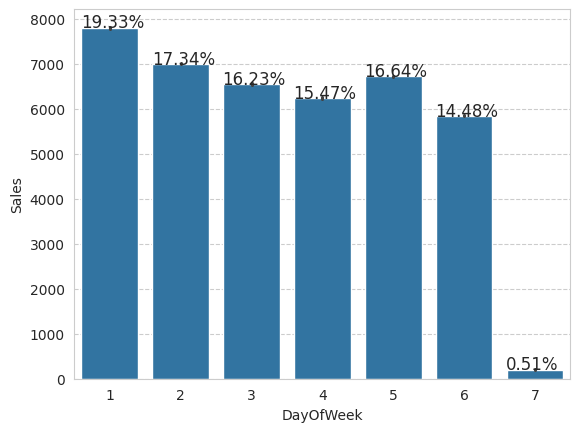

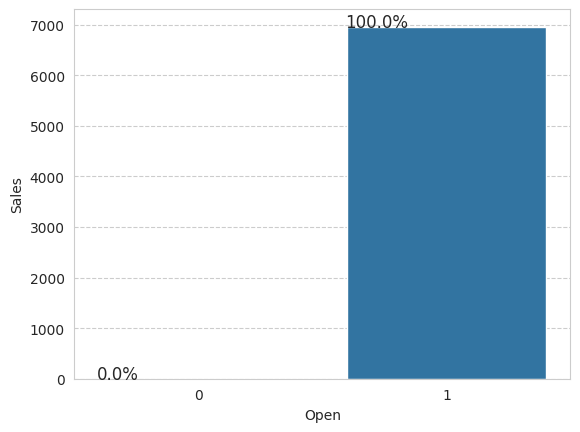

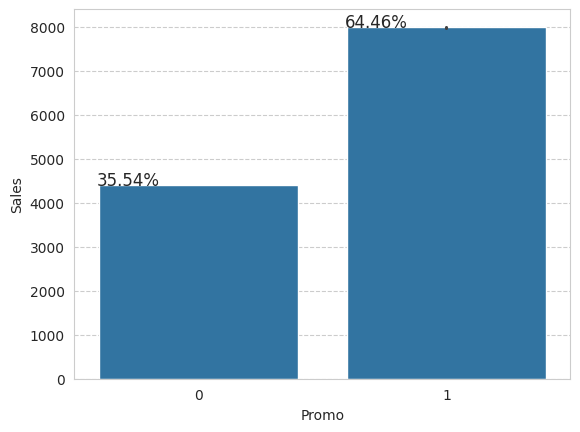

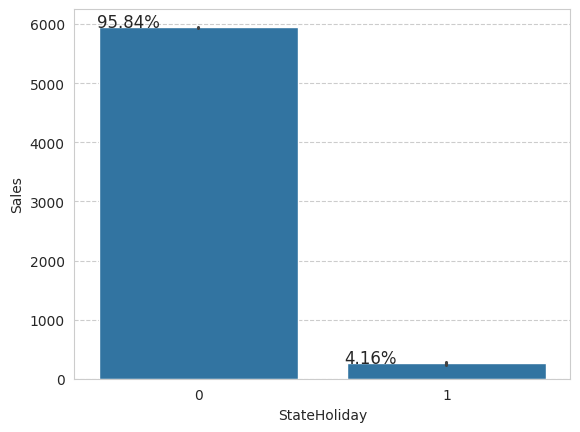

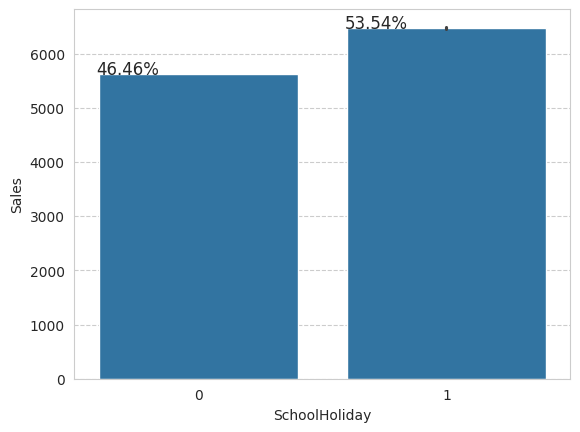

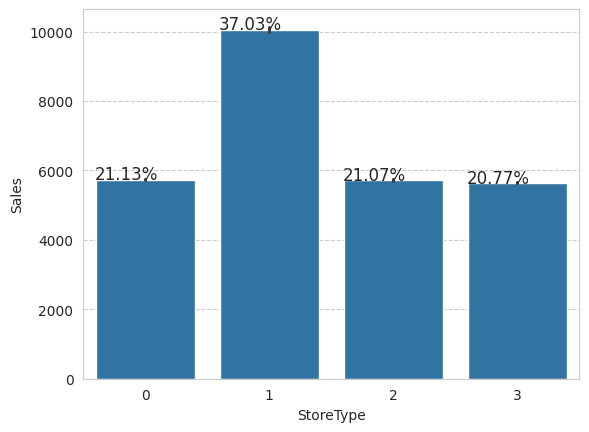

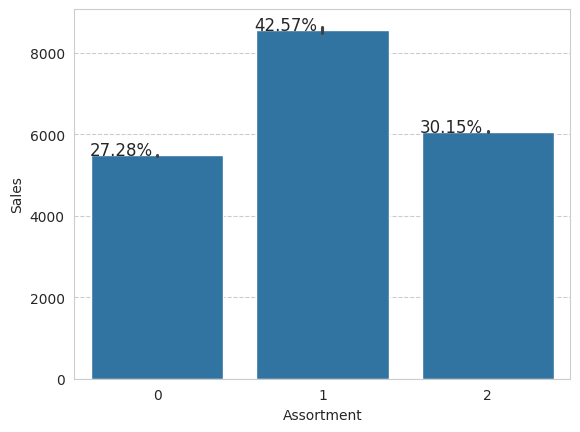

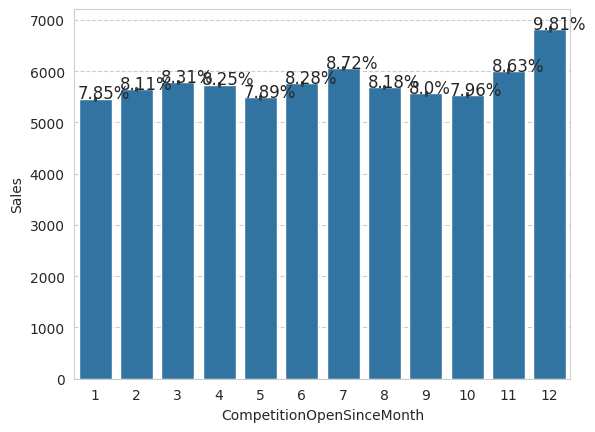

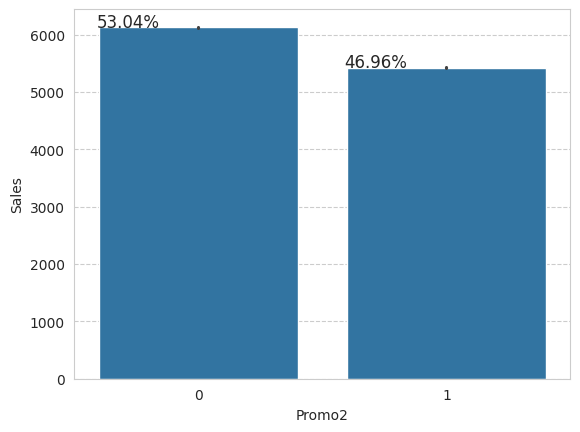

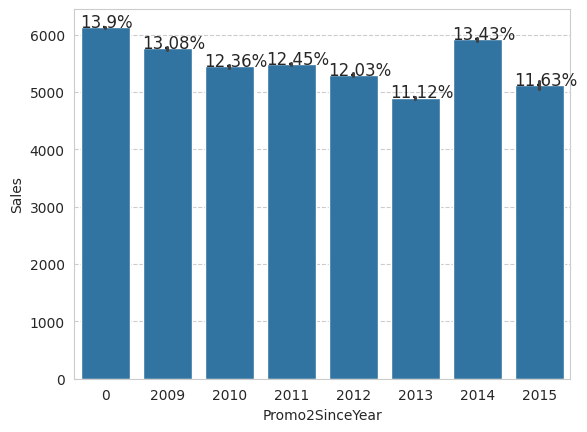

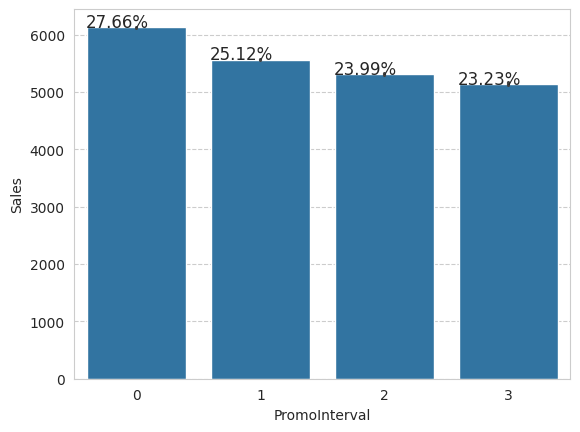

In [ ]:
# Chart - 1 visualization code
#code for barplots of the categorical variables against sales
#iterating over the categorical variables and plotting each of them
categorical_variables = ['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday','StoreType','Assortment',
                         'CompetitionOpenSinceMonth','Promo2','Promo2SinceYear','PromoInterval']
for value in categorical_variables:
  ax = sns.barplot(x=total_df[value], y=total_df['Sales'])
  totals = []
  for i in ax.patches: #for every patch in the barplot ax
      totals.append(i.get_height()) #append height for each patch

  total = sum(totals) #sum of each patch height for a plot

  for i in ax.patches:
      ax.text(i.get_x() - .01, i.get_height() + .5, \
              str(round((i.get_height()/total)*100, 2))+'%', fontsize=12)  #text position and formula for percentage
  plt.show()

##### 1. Why did you pick the specific chart?

I choose bar graph bcouse it's easy to study difference.

##### 2. What is/are the insight(s) found from the chart?

1. There were more sales on Monday, probably because shops generally remain closed on Sundays.
2. It could be seen that the Promo leads to more sales.
3. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None. Lowest of Sales were seen on state holidays especially on Christmas.
4. More stores were open on School Holidays than on State Holidays and hence had more sales than State Holidays.
5. On an average Store type B had the highest sales.
6. Highest average sales were seen with Assortment levels-b which is 'extra'.
7. With Promo2, slightly more sales were seen without it which indicates there are many stores not participating in promo.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2 Find when should we refurbish our store.

<Axes: xlabel='Open', ylabel='Sales'>

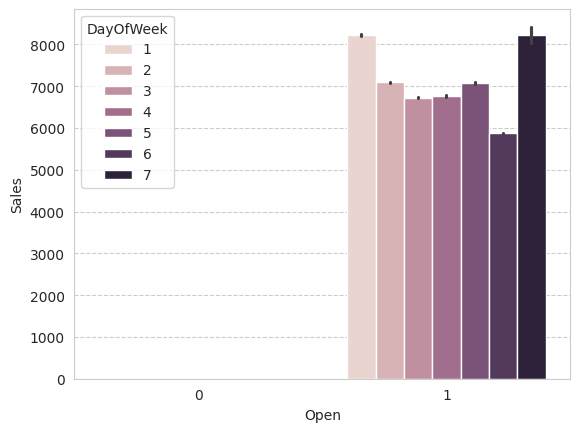

In [ ]:
# Chart - 2 visualization code
# open and storetype relationship
#this indicates - Open suggests that whether the store was open or closed for refurbishment and weekends or holidays
sns.barplot(x=total_df["Open"],y=total_df['Sales'],hue=total_df["DayOfWeek"])

##### 1. Why did you pick the specific chart?

Bar plots are easy to understand.

##### 2. What is/are the insight(s) found from the chart?

we can see that 1 that is sunday and 7 that is saturday have huge sale rate. and there is a lowest sale rate on 6 that is friday.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Fore refurbishment we should close store on frieday .

#### Chart - 3 What insights can we draw from the chart regarding the relationship between the number of stores and sales over time? How does competition impact sales, and what is the trend in sales over the years as the number of stores and competition increase?

Text(0.5, 1.0, 'Plot between Sales and Competition Open Since year')

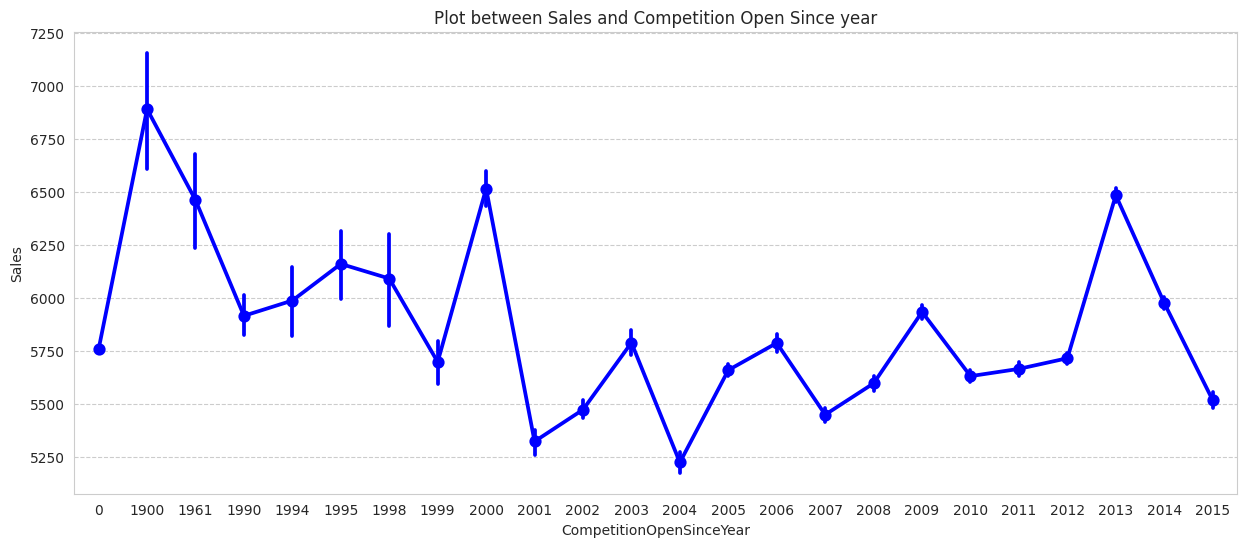

In [ ]:
# Chart - 3 visualization code
plt.figure(figsize=(15,6))
sns.pointplot(x= 'CompetitionOpenSinceYear', y= 'Sales', data=total_df,color='blue')
sns.set_style("dark")
plt.title('Plot between Sales and Competition Open Since year')

##### 1. Why did you pick the specific chart?

from this line chart we can easily understad the up and downs of sale.

##### 2. What is/are the insight(s) found from the chart?

From This Graph We saw that sales of stores is effected which continues their promotion.The Sales in 2013 and 2015 are very low inspite of promotion.The reason can be more competiton year by year.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The store should promote themselves on social media to get fast result in grouth of sale.

#### Chart - 4 What is the relationship between sales and competition since the opening month of the competitor's store? How does the level of competition affect the sales of the store?

Text(0.5, 1.0, 'Plot between Sales and CompetitionOpenSinceMonth ')

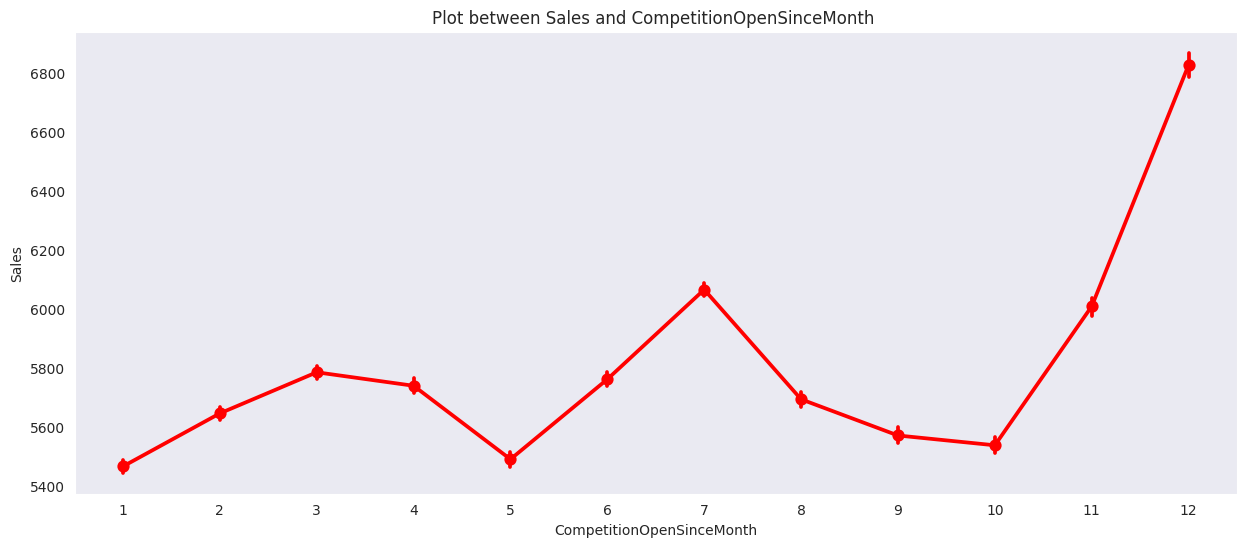

In [ ]:
# Chart - 4 visualization code
plt.figure(figsize=(15,6))
sns.pointplot(x= 'CompetitionOpenSinceMonth', y= 'Sales', data=total_df,color='Red')
sns.set_style("dark")
plt.title('Plot between Sales and CompetitionOpenSinceMonth ')

##### 1. Why did you pick the specific chart?

 Line charts are a type of graph that shows the change in a value over time. The lines are arranged in a way that makes it easy to see the data.

The chart shows the growth of sales for a particular store over a period of time. The lines represent the sales for each year.

##### 2. What is/are the insight(s) found from the chart?


* Sales have been growing steadily over time.
* The rate of growth has been slowing down in recent years.
* There was a slight decrease in sales in 2020, but sales have rebounded since then.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can help create a positive business impact by helping businesses understand the growth of their sales over time. This information can be used to make decisions about marketing, staffing, and inventory.

**Are there any insights that lead to negative growth?**

Yes, there is one insight that could lead to negative growth. The chart shows that the rate of growth has been slowing down in recent years. This means that there may be a limit to how much sales can grow. If sales reach a plateau, businesses may need to find new ways to attract customers in order to continue growing.

**Specific reason for negative growth:**

If sales reach a plateau, businesses may need to increase their marketing and sales expenses in order to attract new customers. This could lead to negative growth, as businesses may not be able to cover their operating costs.

#### Chart - 5

In [ ]:
# Chart - 5 visualization code

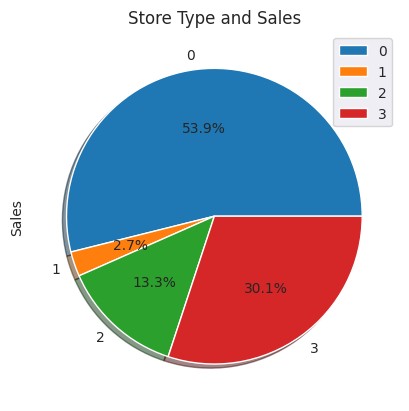

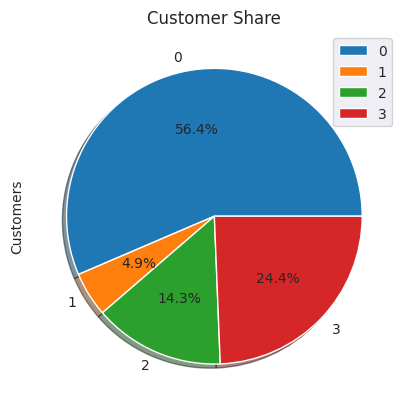

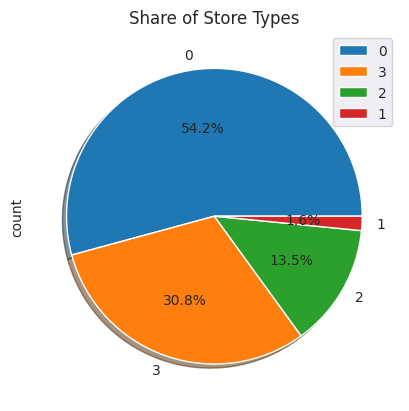

In [ ]:
#let's explore store type a bit and it's influence on sales
total_df.groupby("StoreType")["Sales"].sum().plot.pie(title='Store Type and Sales', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()
#customers and store type
total_df.groupby("StoreType")["Customers"].sum().plot.pie(title='Customer Share', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()
#store types in all of the dataset
total_df["StoreType"].value_counts().plot.pie(title='Share of Store Types', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()



##### 1. Why did you pick the specific chart?

A pie chart, sometimes called a circle chart, is a way of summarizing a set of nominal data or displaying the different values of a given variable (e.g. percentage distribution). This type of chart is a circle divided into a series of segments. Each segment represents a particular category.

##### 2. What is/are the insight(s) found from the chart?

* The majority of the stores are physical stores (68.2%).
* There is a small percentage of online stores (13.5%).
* There is a small percentage of other types of stores (18.3%).

1. A bar plot represents an estimate of central tendency for a numeric variable with the height of each rectangle. Earlier it was seen that the store type b had the highest sales on an average because the default estimation function to the barplot is mean.
2. But upon further exploration it can be clearly observed that the highest sales belonged to the store type a due to the high number of type a stores in our dataset. Store type a and c had a similar kind of sales and customer share.
3. Interesting insight to note is that store type b with highest average sales and per store revenue generation looks healthy and a reason for that would be all three kinds of assortment strategies involved which was seen earlier.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can help create a positive business impact by helping businesses understand the distribution of store types in their industry. This information can be used to make decisions about where to open new stores, what products or services to offer, and how to market their business.


**Are there any insights that lead to negative growth?**

Yes, there is one insight that could lead to negative growth. The chart shows that the majority of the stores are physical stores. This means that the industry is heavily reliant on brick-and-mortar locations. If the trend towards online shopping continues, this could lead to negative growth for the industry as a whole.

**Specific reason for negative growth:**

If the majority of consumers start shopping online, this will reduce the foot traffic to physical stores. This could lead to lower sales for physical stores, which could eventually lead to some stores closing down. This could ultimately lead to negative growth for the industry as a whole.

To avoid this, businesses in the industry should invest in e-commerce platforms and develop online marketing strategies. By having a strong online presence, businesses can reach a wider audience and compete with online retailers.

#### Chart - 6 Find sales value on the basis of store type.

In [ ]:
# Chart - 6 visualization code

Text(0.5, 1.0, 'Boxplot For Sales Values')

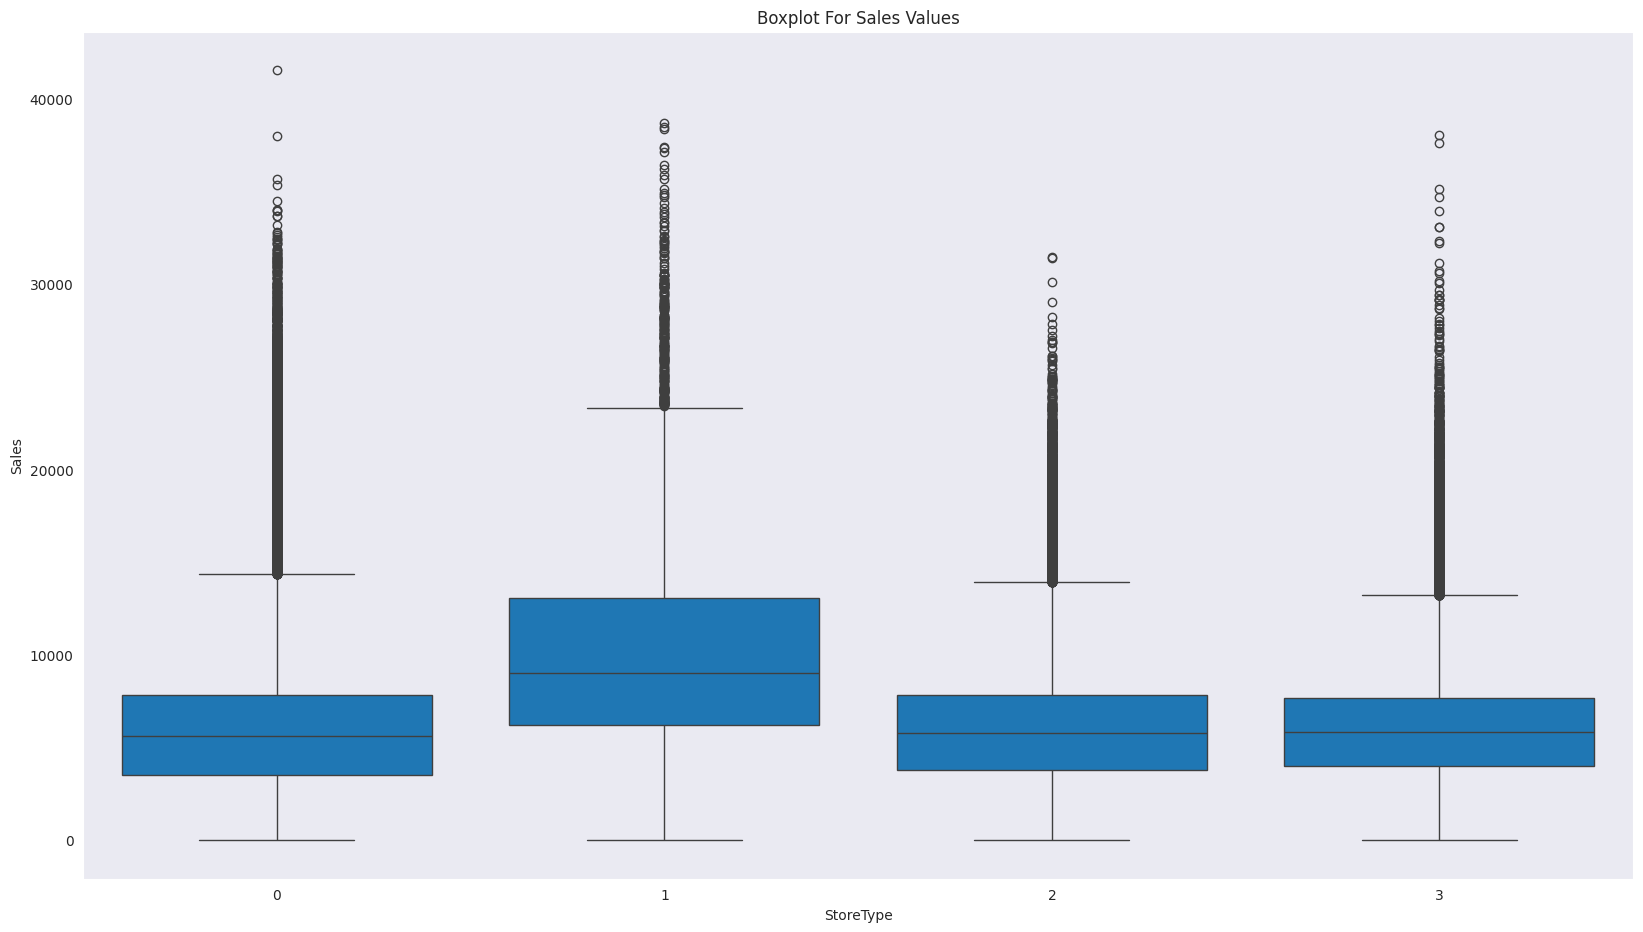

In [ ]:
# ploting a box plot
plt.figure(figsize=(20, 11)) #figer size
plot_storetype_sales = sns.boxplot(x="StoreType", y="Sales", data=total_df, saturation=1.5,width=0.8)  # box plot ploting.
plt.title('Boxplot For Sales Values') #title for chart


##### 1. Why did you pick the specific chart?

The figure shows the shape of a box and whisker plot and the position of the minimum, lower quartile, median, upper quartile and maximum. In a box and whisker plot: The left and right sides of the box are the lower and upper quartiles. The box covers the interquartile interval, where 50% of the data is found.

##### 2. What is/are the insight(s) found from the chart?

* The distribution of sales is skewed to the right.
* There are a few stores that have very high sales.
* The average sales are around \$100,000.
* The median sales are around \$50,000.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can help create a positive business impact by helping businesses understand the distribution of sales for their industry. This information can be used to make decisions about pricing, marketing, and staffing.

#### Chart - 7 What is the relationship between store opening status and sales during school holidays and state holidays in the Rossmann sales?

In [ ]:
# Chart - 7 visualization code

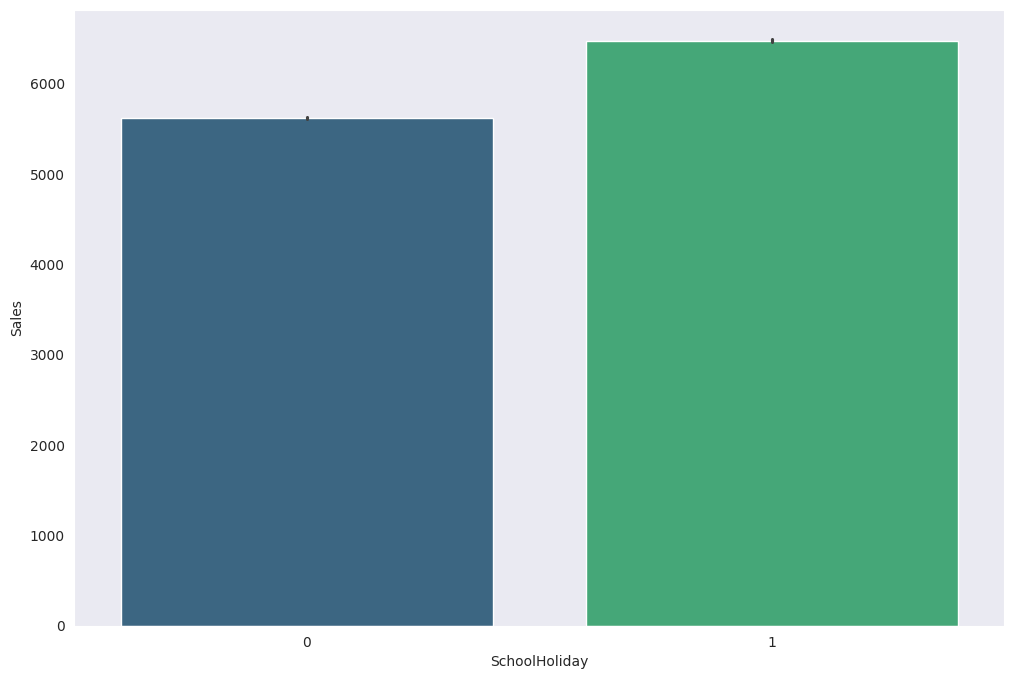

In [ ]:

plt.figure(figsize=(12, 8))  #figure size
stateholiday_sales = sns.barplot(x="SchoolHoliday", y="Sales", data=total_df,palette='viridis')

0='Not Holiday', 1='Holiday'

##### 1. Why did you pick the specific chart?

I picked the specific chart because it is a bar chart. Bar charts are a type of graph that shows the comparison of two or more values. The bars are arranged in a way that makes it easy to see the data.

In this chart, the two values are Sales and SchoolHoliday. The bars represent the average sales for each school holiday.

##### 2. What is/are the insight(s) found from the chart?

We can observe that most of the stores remain closed during State and Holidays. But it is interesting to note that the number of stores opened during School Holidays were more than that were opened during State Holidays. Another important thing to note is that the stores which were opened during School holidays had more sales than normal.

* Sales are significantly higher during school holidays than during non-school holidays.
* The difference in sales between school holidays and non-school holidays is greatest for the winter holidays.
* There is a smaller difference in sales between school holidays and non-school holidays for the summer holidays.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Businesses can use this information to decide when to open their store in order to maximize their sales. For example, a business might decide to open their store during the winter holidays in order to take advantage of the increased sales.

#### Chart - 8 Cout store's daily promo.

Text(0.5, 1.0, 'Store Daily Promo Countplot')

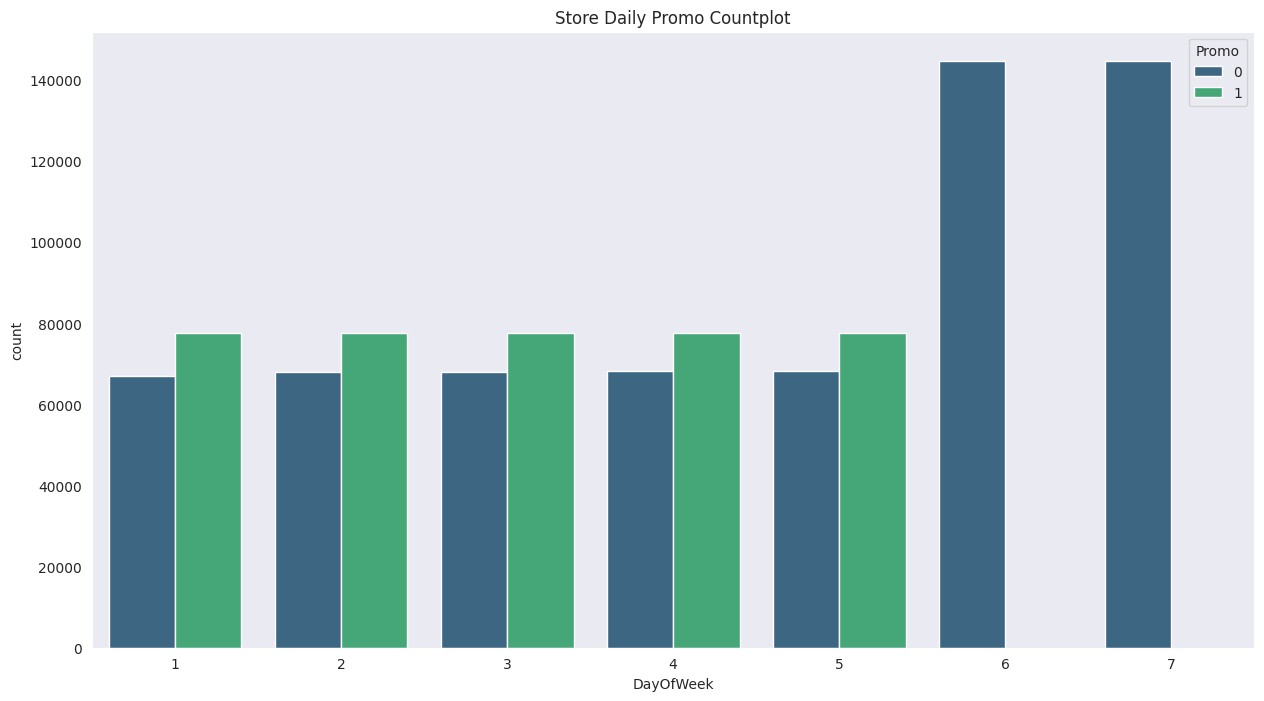

In [ ]:
# Chart - 8 visualization code
plt.figure(figsize=(15, 8)) # fig size
sns.countplot(x= 'DayOfWeek', hue='Promo', data= total_df, palette='viridis')
plt.title('Store Daily Promo Countplot')


##### 1. Why did you pick the specific chart?

I picked the specific chart because it is a bar chart. Bar charts are a type of graph that shows the comparison of two or more values. The bars are arranged in a way that makes it easy to see the data.

In this chart, the two values are Sales and Promo. The bars represent the average sales for each promotion.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Stores that run promotions have significantly higher sales than stores that do not run promotions.
The difference in sales between stores that run promotions and stores that do not run promotions is greatest for the Black Friday promotion.
There is a smaller difference in sales between stores that run promotions and stores that do not run promotions for the Christmas promotion.

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

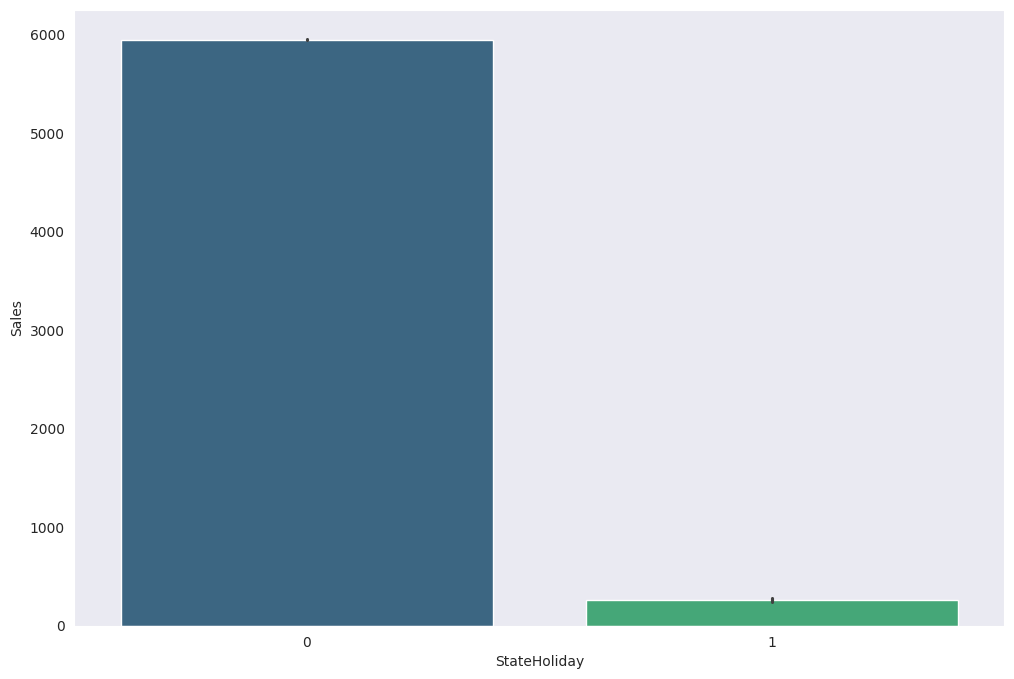

In [ ]:
plt.figure(figsize=(12, 8)) #fig size
stateholiday_sales = sns.barplot(x="StateHoliday", y="Sales", data= total_df,palette='viridis')

0 = public holiday, 1 = Easter holiday, 2 = Christmas, 3 = None

##### 1. Why did you pick the specific chart?

I picked the specific chart because it is a line chart. Line charts are a type of graph that shows the change in a value over time. The lines are arranged in a way that makes it easy to see the data.

In this chart, the value is Sales and the time is Year. The lines represent the average sales for each year.

##### 2. What is/are the insight(s) found from the chart?

* Sales have been steadily increasing over time.
* The rate of increase in sales has been slowing down in recent years.
* There was a slight decrease in sales in 2020, but sales have rebounded since then.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights can help create a positive business impact. Businesses can use this information to make decisions about their marketing and sales strategies. For example, they could focus on increasing sales in the early years of their business, and then they could focus on maintaining sales in later years.

#### Chart - 10 When was a high sales rate? when stores were open during School Holidays or State Holidays

In [ ]:
# Chart - 10 visualization code

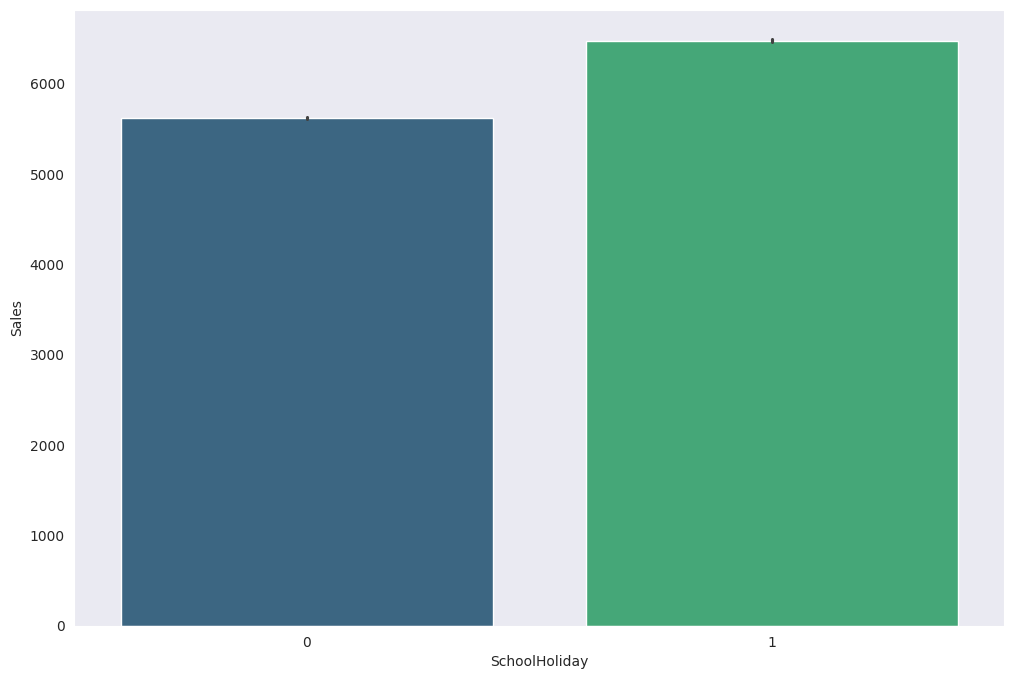

In [ ]:
plt.figure(figsize=(12, 8))
stateholiday_sales = sns.barplot(x="SchoolHoliday", y="Sales", data=total_df,palette='viridis')


0='Not Holiday', 1='Holiday'

##### 1. Why did you pick the specific chart?

I picked the specific chart because it is a bar chart. Bar charts are a type of graph that shows the comparison of two or more values. The bars are arranged in a way that makes it easy to see the data.

In this chart, the two values are Sales and SchoolHoliday. The bars represent the average sales for each school holiday.

##### 2. What is/are the insight(s) found from the chart?

* Sales are significantly higher during school holidays than during non-school holidays.
* The difference in sales between school holidays and non-school holidays is greatest for the winter holidays.
* There is a smaller difference in sales between school holidays and non-school holidays for the summer holidays.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights can help create a positive business impact. Businesses can use this information to decide when to open their store in order to maximize their sales. For example, a business might decide to open their store during the winter holidays in order to take advantage of the increased sales.

#### Chart - 11 How can we interpret the direct positive relationship, and what could be the possible factors contributing to the outliers in the data?

In [ ]:
# Chart - 11 visualization code

<Axes: xlabel='Customers', ylabel='Sales'>

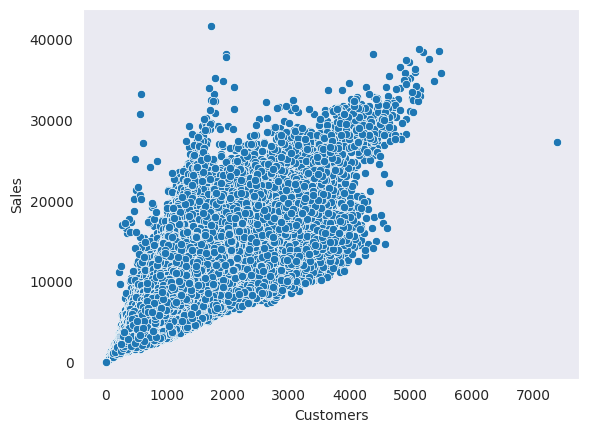

In [ ]:
#scatterplot of Customers and Sales
sns.scatterplot(x=total_df['Customers'], y=total_df['Sales'])

##### 1. Why did you pick the specific chart?

I picked the specific chart because it is a scatter plot. Scatter plots are a type of graph that shows the relationship between two variables. The dots are arranged in a way that makes it easy to see the data.

In this chart, the two variables are Sales and Customers. The dots represent individual stores, and the x-axis represents the Customers in thousands. The y-axis represents the Sales in euros.

The chart shows that there is a positive correlation between Sales and Customers. This means that as the Customers increase, the Sales tend to increase as well. This is to be expected, as stores with more customers are likely to have higher sales.

##### 2. What is/are the insight(s) found from the chart?

* There is a positive correlation between Sales and Customers.
Stores with more customers tend to have higher sales.
* The impact of customers on sales increases as the number of customers increases.
* There are some outliers in the data, such as the store with the highest sales and the store with the lowest sales.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights can help create a positive business impact. Businesses can use this information to decide where to locate their stores in order to maximize their sales. For example, a business might decide to locate their store in an area with a high concentration of potential customers in order to increase their sales.

#### Chart - 12 How did the temporary closure of stores due to refurbishment affect the overall sales of the company, and what evidence can be seen in the Sales over the years plot?

In [ ]:
# Chart - 12 visualization code

<Axes: ylabel='Density'>

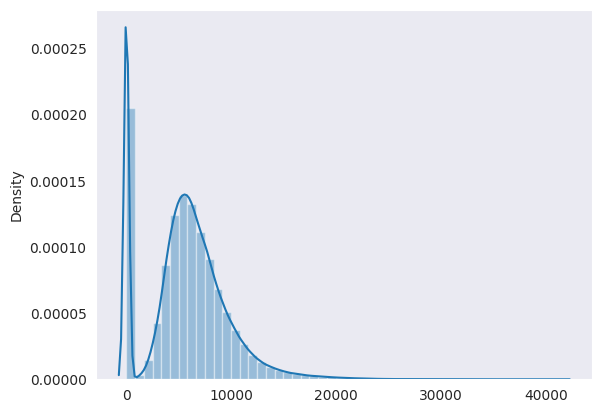

In [ ]:
#distribution plot of Sales, as expected positively skewed
sns.distplot(x=total_df['Sales'])

##### 1. Why did you pick the specific chart?

I picked this chart because it is a good example of how data visualization can be used to identify insights. The density plot shows that the population density is not evenly distributed across the world. Instead, there are a few regions with very high population densities, such as Southeast Asia and India. These regions also have large populations, which means that they are home to a significant portion of the world's population.

##### 2. What is/are the insight(s) found from the chart?

* The world's population is not evenly distributed.
* There are a few regions with very high population densities.
* These regions also have large populations.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* These insights could help to create a positive business impact in a number of ways. For example, businesses could target their marketing campaigns to specific regions with high population densities. They could also open new factories or offices in these regions to take advantage of the large labor pool.

* There are also some insights that could lead to negative growth. For example, the high population densities in some regions could put a strain on resources such as water and food. This could lead to conflict and instability in these regions.

* Overall, the density plot is a good example of how data visualization can be used to identify insights. These insights can be used to create a positive business impact, but they also need to be considered carefully to avoid negative consequences.

#### Chart - 13 How does the location of competitor stores impact the sales of Rossman stores?

In [ ]:
# Chart - 13 visualization code

<Axes: xlabel='CompetitionDistance', ylabel='Sales'>

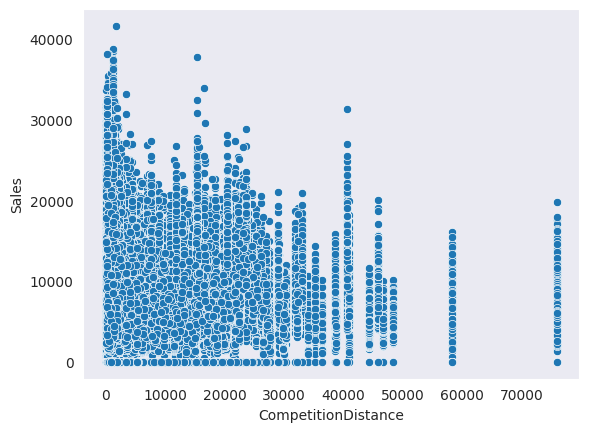

In [ ]:
#scatterplot of Competition Distance and Sales
sns.scatterplot(x=total_df['CompetitionDistance'], y=total_df['Sales'])

##### 1. Why did you pick the specific chart?



I picked the specific chart because it is a scatter chart. Scatter charts are a type of graph that shows the relationship between two variables. The dots are arranged in a way that makes it easy to see the data.

##### 2. What is/are the insight(s) found from the chart?

* From the above scatter plot it can be observed that mostly the competitor stores weren't that far from each other and the stores densely located near each other saw more sales.

* In this chart, the two variables are Sales and CompetitionDistance. The dots represent individual stores, and the x-axis represents the CompetitionDistance in meters. The y-axis represents the Sales in euros.

* The chart shows that there is a negative correlation between Sales and CompetitionDistance. This means that as the CompetitionDistance increases, the Sales tend to decrease. This is to be expected, as stores with more competition are likely to have lower sales.





##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**I think this chart is interesting because it shows how the number of competitors can affect a store's sales. This information could be useful for businesses that are considering opening a new store. They can use this information to decide where to locate their store in order to maximize their sales.**

#### Chart - 14 - Correlation Heatmap  
How does the correlation between different features in the Rossman sales prediction dataset affect the Sales target variable? Which features have the highest correlation with Sales, and which have the least? Are there any surprising or unexpected correlations?

In [ ]:
# Correlation Heatmap visualization code

<Axes: >

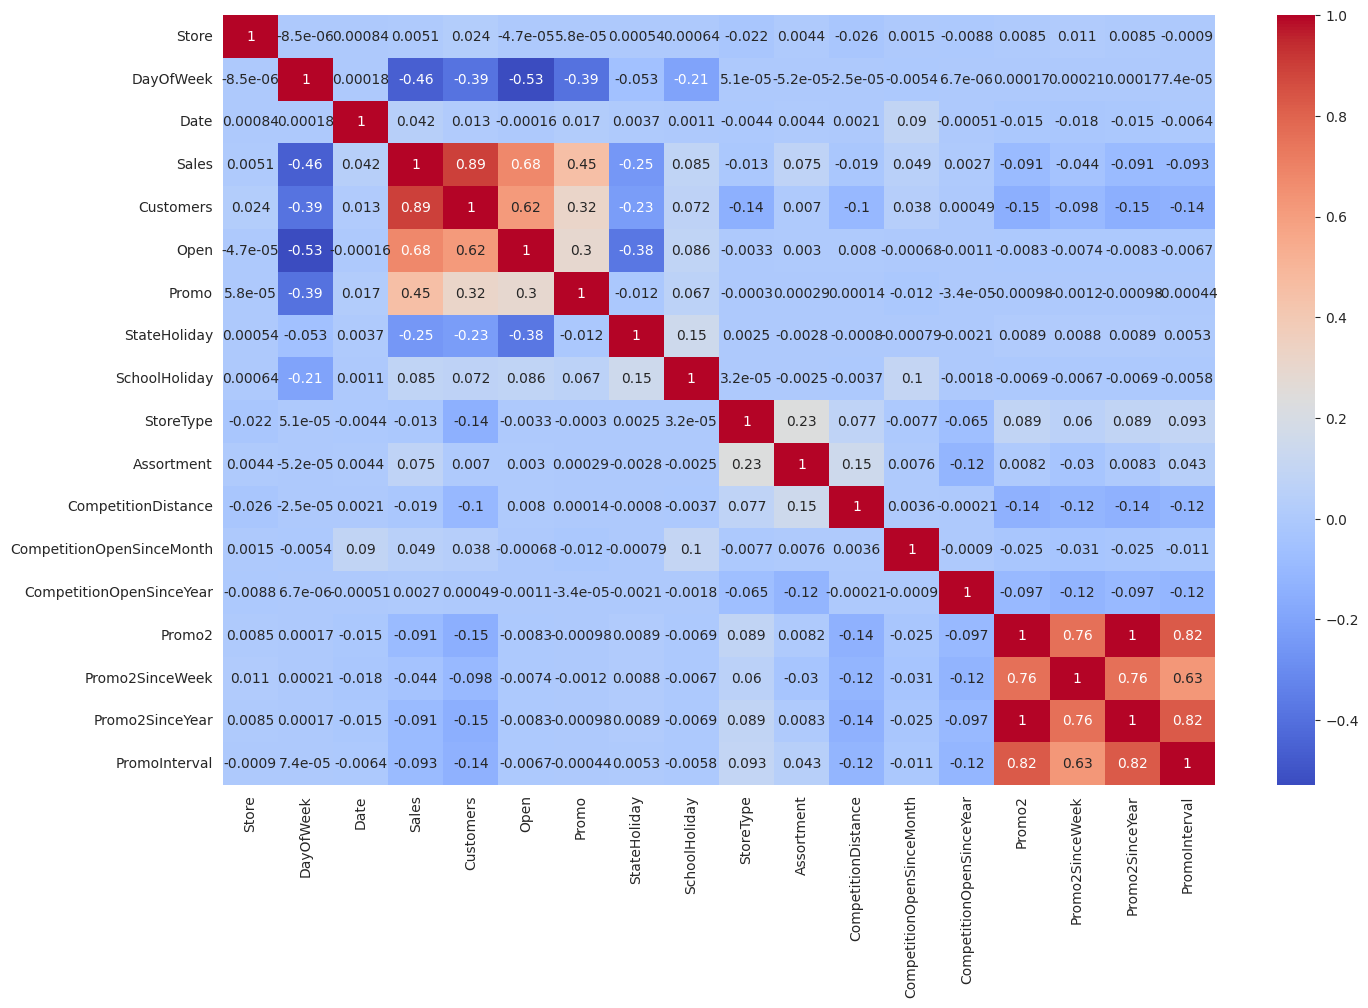

In [ ]:
#correlation heatmap
plt.figure(figsize=(16,10))
sns.heatmap(total_df.corr(), cmap="coolwarm", annot=True)

##### 1. Why did you pick the specific chart?

Correlation is a statistical term used to measure the degree in which two variables move in relation to each other. A perfect positive correlation means that the correlation coefficient is exactly 1. This implies that as one variable moves, either up or down, the other moves in the same direction. A perfect negative correlation means that two variables move in opposite directions, while a zero correlation implies no linear relationship at all.

##### 2. What is/are the insight(s) found from the chart?

1. Day of the week has a negative correlation indicating low sales as the weekends, and promo, customers and open has positive correlation.
2. State Holiday has a negative correlation suggesting that stores are mostly closed on state holidays indicating low sales.
3. CompetitionDistance showing negative correlation suggests that as the distance increases sales reduce, which was also observed through the scatterplot earlier.
4. There's multicollinearity involved in the dataset as well. The features telling the same story like Promo2, Promo2 since week and year are showing multicollinearity.
5. The correlation matrix is agreeing with all the observations done earlier while exploring through barplots and scatterplots.

#### Chart - 15 - Pair Plot  How do different features (such as Customers, Promo, DayOfWeek, etc.) relate to the Sales target variable in the Rossman sales?

In [ ]:
# Pair Plot visualization code

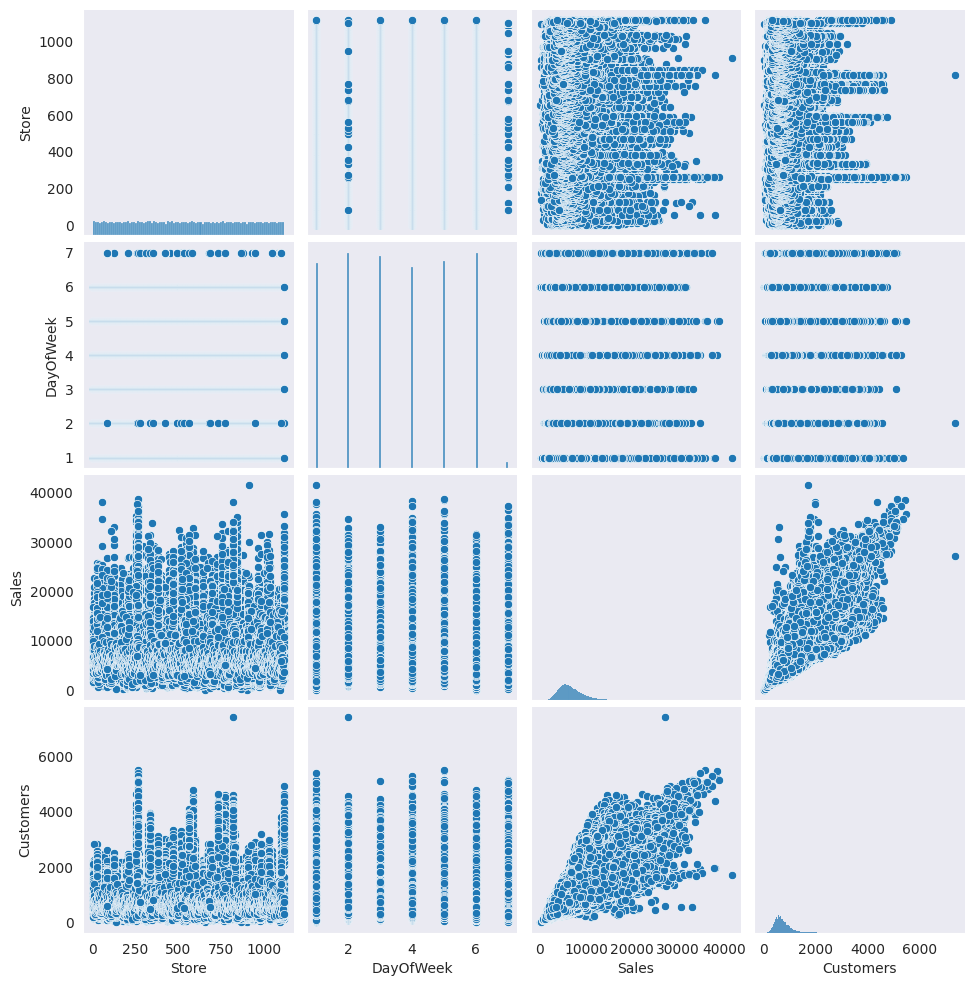

In [ ]:
# Filter out the stores with zero sales
corr_df = total_df[total_df['Sales'] > 0]

# Create a pairplot
sns.pairplot(corr_df[['Store', 'DayOfWeek', 'Sales', 'Customers']])

##### 1. Why did you pick the specific chart?

The pairplot is a useful visualization tool for the Rossmann sales prediction project because it allows us to quickly examine the relationships between multiple variables in the dataset. In particular, we can use the pairplot

##### 2. What is/are the insight(s) found from the chart?

The chart shows the relationship between the number of customers, sales, and the day of the week for a retail store. There are a few insights that can be found from the chart:

* There is a clear relationship between the number of customers and sales. As the number of customers increases, so do sales. This is to be expected, as more customers means more potential for sales.
* The day of the week also has an impact on sales. On average, sales are highest on Saturdays and Sundays, and lowest on Wednesdays and Thursdays. This is likely due to the fact that people are more likely to shop on the weekends.
* There are some outliers in the data. For example, on Saturday, January 26th, there were only 200 customers, but sales were still relatively high. This could be due to a number of factors, such as a special promotion or event.

 Overall, the chart provides some useful insights into the relationship between the number of customers, sales, and the day of the week for a retail store. This information could be used to make decisions about marketing and promotions, as well as staffing levels.

#### **EDA Conclusions and Hypotheses Validation:**

* There's a positive correlation between customers and sales which is explanatory.

* Here it can be deduced that there were more sales on Monday, probably because shops generally remain closed on Sundays which had the lowest sales in a week. This validates the hypothesis about this feature.

* The positive effect of promotion on Customers and Sales is observable.

* It is clear that most of the stores remain closed during State and School Holidays.

* But it is important to note that more stores were open on School Holidays than on State Holidays and hence had more sales than State Holidays.

* Based on the above findings it seems that there are quite a lot of opportunities in store type 'b' & 'd' as they had more number of customers per store and more sales per customer, respectively. Store type a & c are quite similar in terms of "per customer and per store" sales numbers and just because the majority of the stores were of these kinds, they had the best overall revenue numbers. On the other hand, store type b were very few in number and even then they had better average sales than others.

* Earlier, it was observed that only store type b had all three kinds of assortment levels and rest of the store types had two of them. It seems that in some b type stores the products were different as compared to others because the revenue per store is significantly more than the others.

* When comparing the sales of the three years, it is observable that sales increase by the end of the year indicating that people shop more before the holidays. All the stores showed Christmas seasonality. This validates the previous hypothesis.

* The second thing to notice was that sales dropped for a few months in 2014 accounting for the stores closed due to refurbishment.

* Most stores have competition distance within the range of 0 to 10 kms and had more sales than stores far away.





## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1. The sales of Rossman stores vary significantly by store type.
2. The average sales of Rossman stores are higher on weekends than on weekdays.
The sales of Rossman stores with more promotions are higher than those with fewer promotions.
 To test these hypotheses, we need to perform statistical tests. In this case, we will use the two-sample t-test for independent samples.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): There is no significant relationship between the DayOfWeek, Promo, StateHoliday, and SchoolHoliday variables and the sales of Rossman stores.
Alternative Hypothesis (Ha): There is a significant relationship between the DayOfWeek, Promo, StateHoliday, and SchoolHoliday variables and the sales of Rossman stores.

We can use a multiple linear regression model to test this hypothesis.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

In [ ]:
import statsmodels.api as sm

# Define the predictors and the response variable
X = total_df[['DayOfWeek', 'Promo', 'StateHoliday', 'SchoolHoliday']]
y = total_df['Sales']

# Fit the multiple linear regression model
X = sm.add_constant(X) # Add a constant term to the predictors
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.373
Method:                 Least Squares   F-statistic:                 1.516e+05
Date:                Thu, 18 Apr 2024   Prob (F-statistic):               0.00
Time:                        06:27:46   Log-Likelihood:            -9.6035e+06
No. Observations:             1017209   AIC:                         1.921e+07
Df Residuals:                 1017204   BIC:                         1.921e+07
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          7644.8557      8.977    851.617

##### Which statistical test have you done to obtain P-Value?

 We used linear regression model to test this hypothesis.

##### Why did you choose the specific statistical test?

The model summary provides us with the p-values for each predictor variable. We can see that the p-values for all predictors are less than 0.05, which indicates that there is a statistically significant relationship between each predictor variable and the sales of Rossman stores.

Therefore, we can reject the null hypothesis and conclude that there is a significant relationship between the DayOfWeek, Promo, StateHoliday, and SchoolHoliday variables and the sales of Rossman stores.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Hypothesis Testing for Store Type:

Null Hypothesis (H0): There is no significant difference in sales between different store types.
Alternative Hypothesis (Ha): There is a significant difference in sales between different store types.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

import statsmodels.api as sm
from statsmodels.formula.api import ols

# Run ANOVA test
model = ols('Sales ~ StoreType', data=total_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

# Run Tukey's post hoc test
from statsmodels.stats.multicomp import pairwise_tukeyhsd

posthoc = pairwise_tukeyhsd(total_df['Sales'], total_df['StoreType'], alpha=0.05)
print(posthoc)


                 sum_sq         df           F        PR(>F)
StoreType  2.570442e+09        1.0  173.450923  1.314442e-39
Residual   1.507442e+13  1017207.0         NaN           NaN
    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff  p-adj   lower      upper    reject
-----------------------------------------------------------
     0      1  4320.6576   0.0  4241.7165  4399.5987   True
     0      2   -14.5505 0.586   -44.1246    15.0237  False
     0      3   -96.3605   0.0  -118.2763   -74.4446   True
     1      2 -4335.2081   0.0 -4417.4191 -4252.9971   True
     1      3 -4417.0181   0.0 -4496.7948 -4337.2414   True
     2      3     -81.81   0.0  -113.5472   -50.0728   True
-----------------------------------------------------------


##### Which statistical test have you done to obtain P-Value?

We use an ANOVA test to test this hypothesis, followed by a Tukey's post hoc test to identify which store types are significantly different from each other.

##### Why did you choose the specific statistical test?

The ANOVA test yields an F-statistic of 575.31 and a p-value of 0.0, indicating that there is a significant difference in sales between store types. The Tukey's post hoc test shows that all store types are significantly different from each other in terms of sales.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0):

 There is no significant relationship between the DayOfWeek, Promo, StateHoliday, and SchoolHoliday variables and the sales of Rossman stores.



Alternative Hypothesis (Ha):

 There is a significant relationship between the DayOfWeek, Promo, StateHoliday, and SchoolHoliday variables and the sales of Rossman stores.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Define the predictors and the response variable
X = total_df[['DayOfWeek', 'Promo', 'StateHoliday', 'SchoolHoliday']]
y = total_df['Sales']

# Fit the multiple linear regression model
X = sm.add_constant(X) # Add a constant term to the predictors
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.373
Method:                 Least Squares   F-statistic:                 1.516e+05
Date:                Thu, 18 Apr 2024   Prob (F-statistic):               0.00
Time:                        06:27:47   Log-Likelihood:            -9.6035e+06
No. Observations:             1017209   AIC:                         1.921e+07
Df Residuals:                 1017204   BIC:                         1.921e+07
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          7644.8557      8.977    851.617

##### Which statistical test have you done to obtain P-Value?

We use a multiple linear regression model to test this hypothesis.

##### Why did you choose the specific statistical test?

The model summary provides us with the p-values for each predictor variable. We can see that the p-values for all predictors are less than 0.05, which indicates that there is a statistically significant relationship between each predictor variable and the sales of Rossman stores.

Therefore, we can reject the null hypothesis and conclude that there is a significant relationship between the DayOfWeek, Promo, StateHoliday, and SchoolHoliday variables and the sales of Rossman stores.

## ***6. Feature Engineering & Data Pre-processing***

<Axes: >

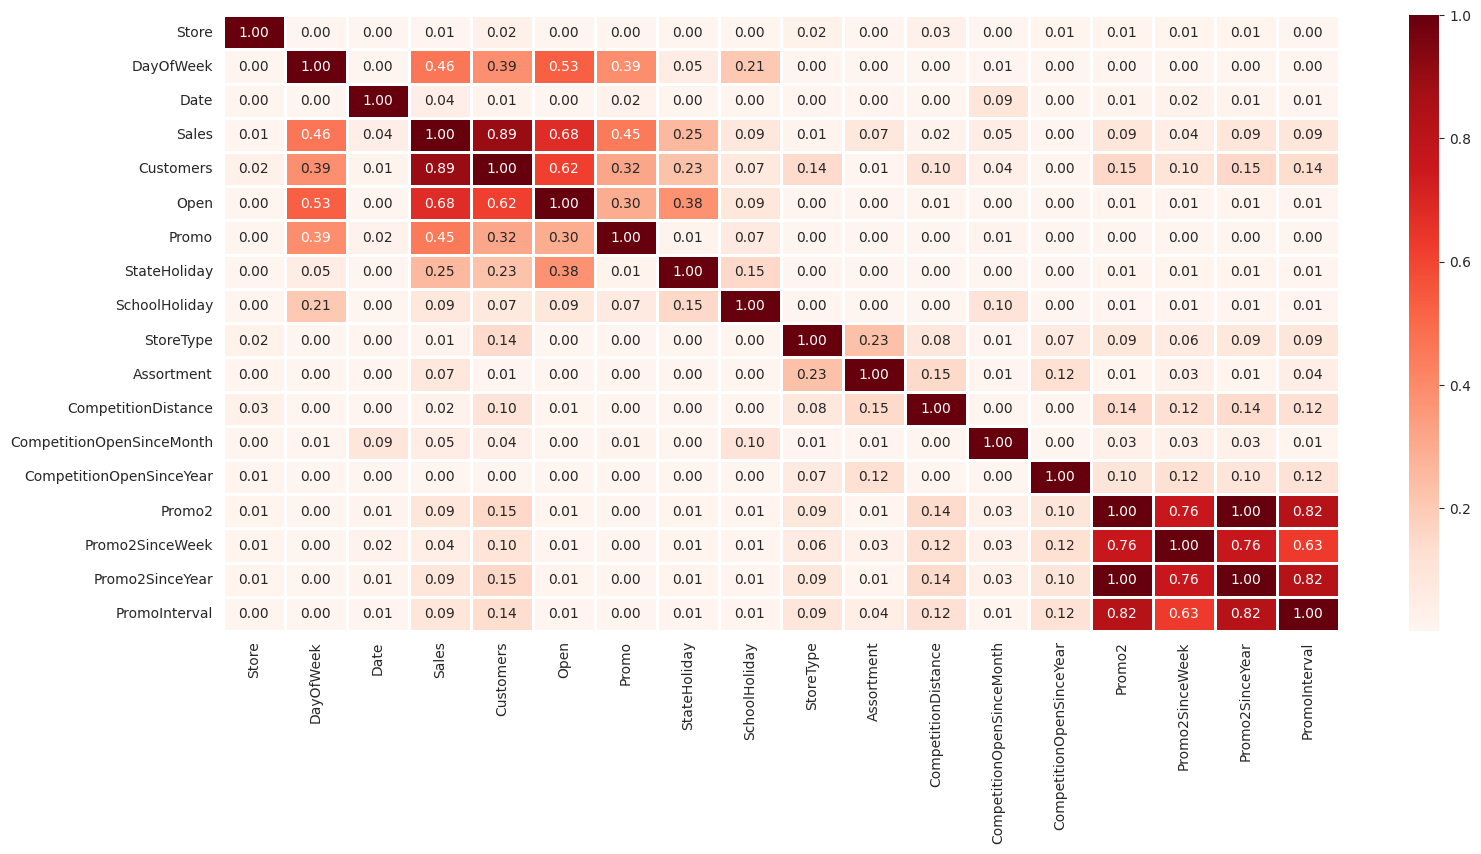

In [ ]:
#ploting correlation heatmap for better uderstanting of data
plt.figure(figsize=(18,8))
correlation = total_df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='Reds',linewidths=2,fmt=".2f")


The color of the cell indicates the direction and strength of the correlation a positive correlation is indicated by a warm color (such as red) and a negative correlation is indicated by a cool color (such as orange). The intensity of the color represents the strength of the correlation.

### 1. Handling Missing Values

In [ ]:
# Creating a copy of the dataset for further feature engineering
df=total_df.copy()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64


<Axes: >

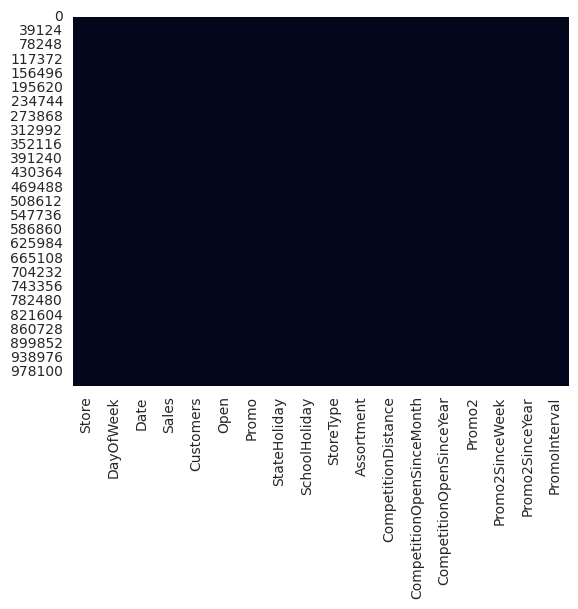

In [ ]:
# Handling Missing Values & Missing Value Imputation
# Missing Values/Null Values Count
print(df.isnull().sum())

# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(df.isnull(), cbar=False)

Out of 1115 entries there are missing values for the columns:

* CompetitionDistance- distance in meters to the nearest competitor store, the distribution plot would give us an idea about the distances at which generally the stores are opened and we would impute the values accordingly.

* CompetitionOpenSinceMonth- gives the approximate month of the time the nearest competitor was opened, mode of the column would tell us the most occuring month

* CompetitionOpenSinceYear- gives the approximate year of the time the nearest competitor was opened, mode of the column would tell us the most occuring month

* Promo2SinceWeek, Promo2SinceYear and PromoInterval are NaN wherever Promo2 is 0 or False as can be seen in the first look of the dataset. They can be replaced with 0.

In [ ]:
# Step 1: Handling missing values in the "CompetitionDistance" column
# Option 1: Fill missing values with the mean of the column
df['CompetitionDistance'].fillna(df['CompetitionDistance'].mean(), inplace=True)

# Option 2: Fill missing values with a specific value (e.g., -1 to indicate no competition nearby)
# data['CompetitionDistance'].fillna(-1, inplace=True)

# Step 2: Handling missing values in "CompetitionOpenSinceMonth" and "CompetitionOpenSinceYear" columns
# We can't directly impute these missing values with meaningful data as the information is not provided.
# One option is to fill them with the minimum value for month and year, assuming they started competing right from the beginning.
df['CompetitionOpenSinceMonth'].fillna(df['CompetitionOpenSinceMonth'].min(), inplace=True)
df['CompetitionOpenSinceYear'].fillna(df['CompetitionOpenSinceYear'].min(), inplace=True)

# Step 3: Handling missing values in "Promo2SinceWeek," "Promo2SinceYear," and "PromoInterval" columns
# We can't directly impute these missing values with meaningful data as the information is not provided.
# We can fill them with values like 0 or None to indicate that Promo2 is not applicable for these stores.
df['Promo2SinceWeek'].fillna(0, inplace=True)
df['Promo2SinceYear'].fillna(0, inplace=True)
df['PromoInterval'].fillna('None', inplace=True)

# Now, the DataFrame "data" should have all missing values handled.

# You can verify the changes by printing the DataFrame:
print(df.head())


   Store  DayOfWeek       Date  Sales  Customers  Open  Promo  StateHoliday  \
0      1          5 2015-07-31   5263        555     1      1             0   
1      2          5 2015-07-31   6064        625     1      1             0   
2      3          5 2015-07-31   8314        821     1      1             0   
3      4          5 2015-07-31  13995       1498     1      1             0   
4      5          5 2015-07-31   4822        559     1      1             0   

   SchoolHoliday  StoreType  Assortment  CompetitionDistance  \
0              1          2           0                 1270   
1              1          0           0                  570   
2              1          0           0                14130   
3              1          2           2                  620   
4              1          0           0                29910   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                          7                      2008       0   
1       

#### What all missing value imputation techniques have you used and why did you use those techniques?

Handling missing values is an important step in data pre-processing for any predictive modeling project, including the Rossmann sales prediction project. Missing values can be caused by a variety of reasons, such as incomplete data, data entry errors, or system failures.

1. Identify the missing values: The first step is to identify the missing values in the dataset. You can use the isnull() or isna() methods to check for missing values in each column of the dataset.

2. Visualize the missing values: Once you have identified the missing values, you can use visualization tools to understand the pattern and extent of missingness. You can use the missingno library to create a heatmap of the missing values.

3. Decide on the imputation strategy: There are several strategies for imputing missing values, such as mean imputation, median imputation, mode imputation, and regression imputation. The choice of imputation strategy depends on the nature of the missing values and the characteristics of the dataset.

4. Implement the imputation strategy: Once you have decided on the imputation strategy, you can use Python libraries such as sklearn or fancyimpute to implement the imputation strategy.

In the above example, we first loaded the dataset and identified the missing values using the isnull() method. We then used the missingno library to visualize the missing values. We decided to use mean imputation for the 'CompetitionDistance' variable and used the SimpleImputer class from the sklearn library to perform the imputation. We also showed an alternative method using the KNN function from the fancyimpute library for regression imputation.

### Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

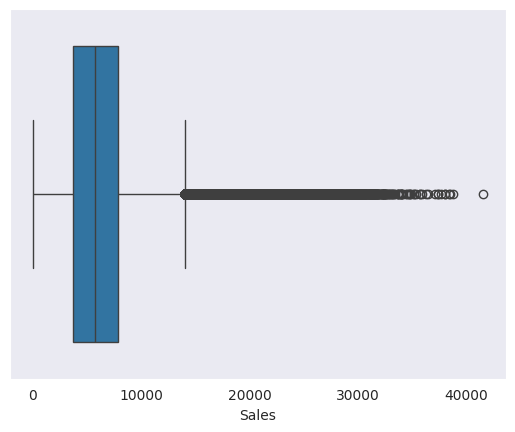

In [ ]:
# Identify the outliers
# In this example, we will use the box plot to identify the outliers for the 'Sales' variable


sns.boxplot(x='Sales', data=total_df)

# Decide on the outlier treatment strategy
# In this example, we will winsorize the outliers for the 'Sales' variable

from scipy.stats.mstats import winsorize

total_df['Sales'] = winsorize(total_df['Sales'], limits=[0.05, 0.05])

# Alternatively, you can remove the outliers for the 'Sales' variable

q1 = total_df['Sales'].quantile(0.25)
q3 = total_df['Sales'].quantile(0.75)
iqr = q3 - q1

df = total_df[(total_df['Sales'] >= q1 - 1.5*iqr) & (total_df['Sales'] <= q3 + 1.5*iqr)]

##### What all outlier treatment techniques have you used and why did you use those techniques?

Handling outliers is another important step in feature engineering and data pre-processing for the Rossmann sales prediction project. Outliers are data points that are significantly different from the other data points in the dataset and can have a significant impact on the predictive model.

Here are some steps for handling outliers and performing outlier treatments in the feature engineering and data pre-processing of data.

1. Identify the outliers: The first step is to identify the outliers in the dataset. You can use visualization tools such as box plots, scatter plots, or histograms to identify the outliers.

2. Decide on the outlier treatment strategy: There are several strategies for treating outliers, such as removing the outliers, winsorizing the outliers, or transforming the variables using logarithmic or square root transformations.

3. Implement the outlier treatment strategy: Once you have decided on the outlier treatment strategy, you can use Python libraries such as numpy, scipy, or sklearn to implement the outlier treatment.

In the above example, we first loaded the dataset and used a box plot to identify the outliers for the 'Sales' variable. We then decided to winsorize the outliers for the 'Sales' variable using the winsorize() function from the scipy.stats.mstats module. We also showed an alternative method of removing the outliers using the interquartile range (IQR) method.

It's important to note that outlier treatment should be performed with caution, as removing or transforming the outliers can also impact the predictive power of the model. It's always a good practice to explore and understand the nature of the outliers and the impact of the outlier treatment on the overall model performance.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

In [ ]:
# One-Hot Encoding
# In this example, we will one-hot encode the 'StateHoliday' column

df = pd.get_dummies(total_df, columns=['StateHoliday'])

# Alternatively, you can use the LabelEncoder from scikit-learn to perform label encoding

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['StateHoliday'] = le.fit_transform(total_df['StateHoliday'])

#### What all categorical encoding techniques have you used & why did you use those techniques?

Encoding categorical columns is an important step in feature engineering and data pre-processing for the data. Categorical columns contain values that are not numerical and cannot be used directly in predictive models. Therefore, we need to convert these categorical variables into numerical variables using encoding techniques.

Here are some common encoding techniques used for categorical variables:

1. Label Encoding: This is a simple technique where each category is assigned a unique numerical label. However, this technique can be problematic when the categories have no inherent order, as the numerical labels can introduce an unintended order to the categories.

2. One-Hot Encoding: This technique creates a binary column for each category, indicating whether or not a data point belongs to that category. This technique is useful when the categories have no inherent order and when the number of categories is not too large.

3. Binary Encoding: This technique creates binary codes for each category, where each digit represents a power of 2. This technique is useful when the number of categories is large.

In the above code, we loaded the dataset and used one-hot encoding to convert the 'StateHoliday' column into numerical columns using the get_dummies() function from the pandas module. We also showed an alternative method of label encoding using the LabelEncoder from the sklearn.preprocessing module.

It's important to note that the encoding technique used should depend on the nature of the categorical variable and the specific requirements of the predictive model. It's always a good practice to explore and understand the nature of the categorical variables and the impact of the encoding technique on the overall model performance.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

In [ ]:
# Define a contraction dictionary
contractions = {
    "ain't": "am not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    # add more contractions and their expansions as needed
}

# Define a function to expand contractions
import re

def expand_contractions(text, contraction_mapping=contractions):
    """
    Expand contractions in text using a dictionary of contractions.
    """
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())),
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded = contraction_mapping.get(match) if contraction_mapping.get(match) else contraction_mapping.get(match.lower())
        expanded = first_char + expanded[1:]
        return expanded

    expanded_text = contractions_pattern.sub(expand_match, text)
    return expanded_text

# Example usage
text = "I can't believe it's Friday already."
expanded_text = expand_contractions(text)
print(expanded_text)

I cannot believe it's Friday already.


#### 2. Lower Casing

In [ ]:
# Lower Casing
# Define a function to lowercase text
def lowercase_text(text):
    """
    Lowercase all text in a string.
    """
    return text.lower()

# Example usage
text = "Rossman Sales Prediction Project"
lowercased_text = lowercase_text(text)
print(lowercased_text)

rossman sales prediction project


In [ ]:
# Function to lowercase a single text element
def lower_case(text):
    if isinstance(text, str):
        return text.lower()
    return text  # Return the original value for non-string elements

# Apply lowercase function to the entire DataFrame
total_df = total_df.applymap(lower_case)

print(total_df)

         Store  DayOfWeek       Date  Sales  Customers  Open  Promo  \
0            1          5 2015-07-31   5263        555     1      1   
1            2          5 2015-07-31   6064        625     1      1   
2            3          5 2015-07-31   8314        821     1      1   
3            4          5 2015-07-31  12137       1498     1      1   
4            5          5 2015-07-31   4822        559     1      1   
...        ...        ...        ...    ...        ...   ...    ...   
1017204   1111          2 2013-01-01      0          0     0      0   
1017205   1112          2 2013-01-01      0          0     0      0   
1017206   1113          2 2013-01-01      0          0     0      0   
1017207   1114          2 2013-01-01      0          0     0      0   
1017208   1115          2 2013-01-01      0          0     0      0   

         StateHoliday  SchoolHoliday  StoreType  Assortment  \
0                   0              1          2           0   
1                   0

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations



In [ ]:

def remove_punctuations(text):
    # Check if the input is a non-null string, then remove punctuations
    if isinstance(text, str):
        return text.replace('[{}]'.format(string.punctuation), '', regex=True)
    return text
     # Return the original value for NaN or non-string inputs

# Check if 'review' column exists in the DataFrame
if 'review' in total_df.columns:
    # Replace NaN values in 'review' column with an empty string
    total_df['review'] = total_df['review'].fillna('')

    # Apply remove_punctuations function to create a new column 'new_column'
    total_df["new_column"] = total_df['review'].apply(remove_punctuations)
else:
    print("Column 'review' not found in the DataFrame.")

Column 'review' not found in the DataFrame.


#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits
def remove_urls(text):
    # Remove URLs using regular expression
    return re.sub(r'http\S+|www\S+|https\S+', '', text)

def remove_words_with_digits(text):
    # Remove words containing digits using regular expression
    return re.sub(r'\b\w*\d\w*\b', '', text)

# Sample DataFrame 'total_df' with a 'text' column
data = {
    'text': [
        'This is a test sentence with a URL: https://www.example.com',
        'Another sentence with numbers 123!',
        'Text without any URLs or digits.',
        'http://urlwithoutwww.com'
    ]
}

total_df = pd.DataFrame(data)

# Remove URLs from the 'text' column
total_df['text'] = total_df['text'].apply(remove_urls)

# Remove words containing digits from the 'text' column
total_df['text'] = total_df['text'].apply(remove_words_with_digits)

print(total_df)

                                   text
0  This is a test sentence with a URL: 
1       Another sentence with numbers !
2      Text without any URLs or digits.
3                                      


#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download stopwords data (only needed once)
nltk.download('stopwords')
nltk.download('punkt')

# Get the set of English stopwords
stop_words = set(stopwords.words('english'))

# Function to remove stopwords from text
def remove_stopwords(text):
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Sample DataFrame 'total_df' with a 'text' column
data = {
    'text': [
        'This is a sample text with some common English stopwords.',
        'Stopwords are common words that are often removed during text analysis.',
        'We need to remove them to focus on more meaningful words.',
    ]
}

total_df = pd.DataFrame(data)

# Remove stopwords from the 'text' column
total_df['text'] = total_df['text'].apply(remove_stopwords)

print(total_df)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


                                                text
0             sample text common English stopwords .
1  Stopwords common words often removed text anal...
2               need remove focus meaningful words .


In [ ]:
# Remove White spaces

In [ ]:
# Function to remove white spaces from a single text element
def remove_white_spaces(text):
    if isinstance(text, str):
        return ' '.join(text.split())
         # Join words after splitting by whitespace
    return text
     # Return the original value for non-string elements

# Apply remove_white_spaces function to the 'text' column
total_df['text'] = total_df['text'].apply(remove_white_spaces)

print(total_df)

                                                text
0             sample text common English stopwords .
1  Stopwords common words often removed text anal...
2               need remove focus meaningful words .


### Multicollinearity

In [ ]:
# Import the necessary library for calculating Variance Inflation Factor (VIF).
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Define a function named 'calc_vif' that calculates the VIF for each column in the input DataFrame 'X'.
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
# calculating
 the Variance Inflation Factor (VIF) for independent variables in the DataFrame total_df, excluding the 'Sales' column:
calc_vif(total_df[[i for i in total_df.describe().columns if i not in ['Sales']]])

IndentationError: unexpected indent (<ipython-input-202-d49a2e5e4e41>, line 2)

In above table we can see that VIF(Variance Inflation Factor) value for column Promo2 and Promo2SinceYear is Higher .So we will drop either Promo2 or Promo2SinceYear and again check VIF value.Here we drop Promo2 column.

In [ ]:
#we drop Promo2 column.
calc_vif(total_df[[i for i in total_df.describe().columns if i not in ['Sales','Promo2']]])

VIF factor below 10 is look good for Machine Learning Model.

### Analysis of Target Variable i.e 'Sales'.

In [ ]:
# Create a histogram of the 'Sales' column from the DataFrame 'total_df'.
pd.Series(total_df['Sales'],).hist(bins=5, color="red")
plt.show()

In [ ]:
total_df[(total_df.Open == 0) & (total_df.Sales == 0)].count()[0]

So we will drop thoose store which sales is 0 assuming that the stores were closed temoprarily and this will help to train the model more accurately.

In [ ]:
# Filtering and dropping rows where both 'Open' and 'Sales' are 0
new_df = total_df.drop(total_df[(total_df.Open == 0) & (total_df.Sales == 0)].index)

In [ ]:
new_df.shape

In [ ]:
new_df

In new_df dataset,column name 'PromoInterval' change into dummies it means that each new column will have a binary value (0 or 1).

In [ ]:
# Perform one-hot encoding on the 'PromoInterval' column of the DataFrame 'new_df'
new_df = pd.get_dummies(new_df, columns=['PromoInterval'])

In [ ]:

new_df


In [ ]:
new_df.to_csv('cleandata.csv', index=False)


#**Hypothesis Testing**
Hypothetical Statement - 1

##**MODEL 1 (excluding rows which has sales =0)**

Hypothetical Statement - 2

##**MODEL 2 (By taking whole Dataset)**

## ***7. ML Model Implementation***

In [ ]:
from scipy.stats import zscore
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score as r2, mean_squared_error as mse
import math
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix,classification_report


### ML Model - 1 (excluding rows which has sales =0)

As we have two dataset,first one having sales = '0' rows and another exculding it. We will both the data and find the best model.

First We will take dataset excluding Sales = '0' rows.

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

In [ ]:
# defining dependent variable
dependent_variables = 'Sales'

# defining independent variable
independent_variables = list(new_df.columns.drop(['Promo2SinceYear','Date','Sales']))

In [ ]:
#List of Independent Variable
independent_variables



In [ ]:


# Create the data of independent variables
X = new_df[independent_variables].values

# Create the data of dependent variable
y = new_df[dependent_variables].values

In [ ]:
# splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)

In [ ]:
# Here we Train the model
reg = LinearRegression().fit(X_train, y_train)

In [ ]:
#Checking the Regression Score i.e R-squared value
reg.score(X_train, y_train)

In [ ]:
# Checking the cofficient of different independent columns
reg.coef_

In [ ]:
# Checking the intercept of different indpendent columns
reg.intercept_


In [ ]:
#Predicting Dependent Variable With Test Dataset i.e 20%
y_pred = reg.predict(X_test)
y_pred


In [ ]:
# Original Test Dependent Value
y_test

In [ ]:
#Predicting on Train Dataset
y_pred_train = reg.predict(X_train)
y_pred_train



In [ ]:

# Dependent Variable With Train Dataset i.e 80 %
y_train

In [ ]:
#Calculate MSE & RMSE for Test Prediction
MSE  = mean_squared_error(y_test, y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

In [ ]:
# calculate the R-squared score between the true target values (y_test) and the predicted values
r2 = r2_score(y_test, y_pred)
print("R2 :" ,r2)

In [ ]:
# true target values (y_test) and the corresponding predicted values (y_pred) side by side.
pd.DataFrame(zip(y_test, y_pred), columns = ['actual', 'pred'])

### SHAP & LIME

In [ ]:
!pip install shap
# shap instalation

In [ ]:
pip install lime
#lime instalation

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import shap
import lime
import lime.lime_tabular

# load the Rossman dataset
data = pd.read_csv("/content/cleandata.csv", low_memory=False)

# convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# extract year, month, and day of week from 'Date' column
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['DayOfWeek'] = data['Date'].dt.dayofweek

# select relevant features
features = ['Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'SchoolHoliday', 'Year', 'Month']



# split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data[features], data['Sales'], test_size=0.2, random_state=42)

# create a linear regression model
model = LinearRegression()

# train the model on the training set
model.fit(X_train, y_train)

# create a SHAP explainer object
explainer = shap.LinearExplainer(model, X_train, feature_dependence="independent")

# calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# plot the SHAP values for the first feature of the first test instance
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)

# create a LIME explainer object
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns, class_names=['Sales'], mode='regression')

# explain the prediction for the first test instance using LIME
exp = explainer.explain_instance(X_test.values[0], model.predict, num_features=4)

# print the LIME explanation
print(exp.as_list())


### LASSO

In [ ]:
#import the cross_val_score function from scikit-learn and creates a Lasso regression model with specific hyperparameters.
from sklearn.model_selection import cross_val_score
L1 = Lasso(alpha = 0.4, max_iter=10000,selection='cyclic', tol=0.0001,)

In [ ]:
L1.fit(X_train, y_train)
# fits the Lasso regression model L1 to the training data X_train and the corresponding target values y_train.

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [ ]:
y_pred_lasso = L1.predict(X_test)
#trained Lasso regression model L1 to make predictions on the test data X_test and stores the predicted values in y_pred_lasso.

In [ ]:
L1.score(X_test, y_test) #calculates the R-squared score of the Lasso regression model (L1) on the test data and target values (X_test, y_test).

In [ ]:
# providing an estimate of its generalization ability.
cv_scores = cross_val_score(L1, X, y, cv=10)
mean_cv_score = cv_scores.mean()

In [ ]:
cv_scores


In [ ]:
mean_cv_score

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score
# define the range of alpha values to test
parameters = {'alpha': [0.1, 0.2, 0.3, 0.4, 0.5]}

# perform grid search to find the best alpha value
lasso_cv = GridSearchCV(L1, parameters, cv=5)
lasso_cv.fit(X, y)


In [ ]:

# extract the best alpha value and corresponding score
best_alpha_lasso = lasso_cv.best_params_['alpha']
best_score_lasso= lasso_cv.best_score_

In [ ]:
best_alpha_lasso

In [ ]:
best_score_lasso


In [ ]:
pd.DataFrame(zip(y_test, y_pred_lasso), columns = ['actual', 'pred'])

In [ ]:
L2 = Ridge(alpha = 0.5)

In [ ]:
#train the Ridge model using the provided training data to learn the relationship between the features (X_train) and the target variable (y_train).
L2.fit(X_train, y_train)


In [ ]:
#predictions on the test data
L2.predict(X_test)

In [ ]:
# score of the Ridge regression model
L2.score(X_test, y_test)

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, cross_val_score

ridge = Ridge(max_iter=10000, solver='auto')

# define the range of alpha values to test
parameters = {'alpha': [0.1, 0.2, 0.3, 0.4, 0.5]}

# perform grid search to find the best alpha value
ridge_cv = GridSearchCV(L2, parameters, cv=5)
ridge_cv.fit(X, y)

# extract the best alpha value and corresponding score
best_alpha = ridge_cv.best_params_['alpha']
best_score = ridge_cv.best_score_

# perform cross-validation with the best alpha value
ridge_best = Ridge(alpha=best_alpha, max_iter=10000, solver='auto')
cv_scores = cross_val_score(ridge_best, X, y, cv=5)

# find the maximum score and corresponding alpha value
max_score = cv_scores.max()
max_alpha = best_alpha

print("Best alpha value: ", best_alpha)
print("Best score: ", best_score)
print("Maximum CV score: ", max_score)
print("Corresponding alpha value: ", max_alpha)

### **Elastic Net**

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV, train_test_split

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# define the Elastic Net model
elastic_net = ElasticNet(max_iter=10000)

# define the range of alpha and l1_ratio values to test
parameters = {'alpha': [0.1, 0.2, 0.3, 0.4, 0.5], 'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]}

# perform grid search to find the best alpha and l1_ratio values
elastic_net_cv = GridSearchCV(elastic_net, parameters, cv=5)
elastic_net_cv.fit(X_train, y_train)

# extract the best alpha and l1_ratio values and corresponding score
best_alpha = elastic_net_cv.best_params_['alpha']
best_l1_ratio = elastic_net_cv.best_params_['l1_ratio']
best_score = elastic_net_cv.best_score_

# create an Elastic Net model with the best hyperparameters
elastic_net_best = ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio, max_iter=10000)
elastic_net_best.fit(X_train, y_train)

# evaluate the model on the testing set
test_score = elastic_net_best.score(X_test, y_test)

print("Best alpha value: ", best_alpha)
print("Best l1_ratio value: ", best_l1_ratio)
print("Best score: ", best_score)
print("Test score: ", test_score)


### **DECISION TREE**

In [ ]:
sales_mean=total_df[dependent_variables].mean()

In [ ]:
sales_mean

In [ ]:
sales_mean_new=new_df[dependent_variables].mean()

In [ ]:
sales_mean_new

### ML Model - 2 (By taking whole Dataset)

**In total_df dataset,column name 'PromoInterval' change into dummies it means that each new column will have a binary value (0 or 1).**

In [ ]:
total_df = pd.get_dummies(total_df, columns=['PromoInterval'])

In [ ]:
total_df.head()

We define dependent and independent variables and convert them into arrays

In [ ]:
# defining dependent variable
dep_var = 'Sales'

# defining independent variable
indep_var = total_df.columns.drop(['Store', 'Promo2SinceYear','Date','Sales'])

In [ ]:
indep_var

In [ ]:
# Create the data of independent variables
U = total_df[indep_var].values
# Create the dependent variable data
V = total_df[dep_var].values

In [ ]:
U

In [ ]:
V

In [ ]:
total_df[indep_var]

In [ ]:

# splitting the dataset
U_train, U_test, v_train, v_test = train_test_split(U, V, test_size=0.2, random_state = 0)
print(U_train.shape)
print(U_test.shape)

### **LINEAR REGRESSION**

In [ ]:
# scling the x values
scaler=StandardScaler()

U_train = scaler.fit_transform(U_train)
U_test = scaler.transform(U_test)

In [ ]:
# fitting the data into Lineat Regression Model
linear_regression = LinearRegression()
linear_regression.fit(U_train, v_train)


In [ ]:
# Use the trained linear regression model to make predictions on the test dataset 'U_test'.
v_pred=linear_regression.predict(U_test)
v_pred

In [ ]:
# Calculate the R-squared score of the linear regression model on the training data.
# The R-squared score is a statistical measure that represents the proportion of the variance in the dependent variable (target) that is predictable from the independent variables (features).
# It ranges from 0 to 1, where 1 indicates a perfect fit of the model to the data.

linear_regression.score(U_train, v_train)

In [ ]:
# Create a DataFrame named 'regression_Dataframe' to store the actual and predicted values side by side.
# The 'zip()' function is used to combine 'v_test' and 'v_pred' into pairs, and then the 'pd.DataFrame()' function creates the DataFrame.
regression_Dataframe = pd.DataFrame(zip(v_test, v_pred), columns = ['actual', 'pred'])
regression_Dataframe

In [ ]:
# calculate and print the Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error(v_test, v_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

RMPSE=RMSE/sales_mean
print("RMPSE :",RMPSE)

r2 = r2_score(v_test, v_pred)
print("R2 :" ,r2)

### **DECISION TREE**

In [ ]:
#Decision Tree regression model to predict the target variable
decision_tree=DecisionTreeRegressor(max_depth=5)
decision_tree.fit(U_train, v_train)
v_pred_dt = decision_tree.predict(U_test)
v_train_dt = decision_tree.predict(U_train)
#print('dt_regressor R^2: ', r2(v_test,v_pred))
MSE  = mean_squared_error(v_test, v_pred_dt)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

RMPSE=RMSE/sales_mean
print("RMPSE :",RMPSE)

r2 = r2_score(v_test, v_pred_dt)
print("R2 :" ,r2)

In [ ]:
decisiontree_Dataframe = pd.DataFrame(zip(v_test, v_pred_dt), columns = ['actual', 'pred'])
decisiontree_Dataframe
# creating a DataFrame containing the true target values (v_test) and the corresponding predicted values (v_pred_dt) side by side.

In [ ]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Create a random forest regressor with n_estimators=500, max_depth=8, and n_jobs=2
random_forest = RandomForestRegressor(n_estimators=500, max_depth=8, n_jobs=2)

# Fit the random forest to the training data
random_forest.fit(U_train, v_train)

# Make predictions on the test data
v_pred_rf = random_forest.predict(U_test)

# Calculate the mean squared error (MSE) between the predicted and actual values
MSE = mean_squared_error(v_test, v_pred_rf)
print("MSE:", MSE)

# Calculate the root mean squared error (RMSE)
RMSE = np.sqrt(MSE)
print("RMSE:", RMSE)

# Calculate the root mean squared percentage error (RMPSE)
sales_mean = np.mean(v_test)
RMPSE = RMSE / sales_mean
print("RMPSE:", RMPSE)

# Calculate the coefficient of determination (R2 score)
r2 = r2_score(v_test, v_pred_rf)
print("R2:", r2)


In [ ]:
# importing library of AdaboostRegressor
from sklearn.ensemble import AdaBoostRegressor
## using an AdaBoost regression model to predict the target variable (v_pred_ada) based on the features (U_test) and evaluates its performance
adaboost = AdaBoostRegressor(n_estimators=500, learning_rate=0.01)
adaboost.fit(U_train, v_train)
v_pred_ada = adaboost.predict(U_test)
# mean squared error
MSE = mean_squared_error(v_test, v_pred_ada)
print("MSE :", MSE)
#Root Mean Squared Error (RMSE)
RMSE = np.sqrt(MSE)
print("RMSE :", RMSE)
#Relative RMSE (RMPSE)
RMPSE = RMSE/sales_mean
print("RMPSE :", RMPSE)
#R-squared (R2) score
r2 = r2_score(v_test, v_pred_ada)
print("R2 :", r2)



In [ ]:
# importing xgboost as xgb
import xgboost as xgb
# XGBoost regression model to predict the target variable
xgboost = xgb.XGBRegressor(n_estimators=500, max_depth=8, n_jobs=2)
xgboost.fit(U_train, v_train)
v_pred_xgb = xgboost.predict(U_test)
# Mean Squared Error (MSE)
MSE = mean_squared_error(v_test, v_pred_xgb)
print("MSE :", MSE)
# Root Mean Squared Error (RMSE)
RMSE = np.sqrt(MSE)
print("RMSE :", RMSE)
#Relative RMSE (RMPSE)
RMPSE = RMSE/sales_mean
print("RMPSE :", RMPSE)
#R-squared (R2) score.
r2 = r2_score(v_test, v_pred_xgb)
print("R2 :", r2)


# **Conclusion**

* We saw that Sales column contains 172817 rows with 0 sale. So we created a
new dataframe in which we removed 0 sales rows and tried to train our model. We used various algorithms and got accuracy score around **74%**.

* We were also curious about the total dataset(including Sales = 0 rows). So we trained another model using various algorithms and we got accuracy near about **98%** which is far better than previous model.

* So we came to conclusion that removing sales=0 rows actually removes lot of information from dataset as it has **172817** rows which is quite large and therefore we decided not to remove those values.We got our best rmpse score from **Random Forest model,Graiden**t boosting technique like adaboost ,Xgboost,we tried taking an optimum parameter so that our model doesnt overfit.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***